In [283]:
import joblib
from sklearn.model_selection import train_test_split
import numpy as np

import pandas as pd

from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import numpy as np

import pickle
import pandas as pd
from sklearn.preprocessing import LabelEncoder

import sys
# In[3]:


from sklearn import svm
from sklearn.model_selection import GridSearchCV


from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from skopt import BayesSearchCV

# Formation_enegry_per_atom

In [377]:
df=pd.read_csv('Xrd_MP_train.csv')


df

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,3.248719e-03,3.209846e-03,3.191943e-03,3.603863e-03,4.364877e-03,4.365354e-03
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,5.057440e-04,6.659170e-04,1.359716e-03,1.955682e-03,1.855699e-03,1.162167e-03
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,1.145214e-03,2.367250e-03,4.537339e-03,5.994360e-03,5.206598e-03,2.917015e-03
3,mp-27930,Li7Si2,-2.904238,Full Formula (Li28 Si8)\nReduced Formula: Li7S...,0.029674,0.0000,-0.214322,orthorhombic,-104.552560,1,...,0.003718,0.002883,0.002181,0.001723,1.791117e-03,2.364931e-03,2.629422e-03,2.153585e-03,1.433836e-03,8.283000e-04
4,mp-672287,Li13Si4,-2.987046,Full Formula (Li26 Si8)\nReduced Formula: Li13...,0.000000,0.0000,-0.251190,orthorhombic,-101.559573,1,...,0.005844,0.004186,0.002611,0.001576,1.250670e-03,1.140817e-03,7.951480e-04,3.545280e-04,9.600000e-05,1.550000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,mp-2699,CaSi2,-4.657817,Full Formula (Ca2 Si4)\nReduced Formula: CaSi2...,0.006962,0.0000,-0.375736,trigonal,-27.946902,5,...,0.009599,0.006740,0.004403,0.004014,3.998245e-03,2.756705e-03,1.150738e-03,2.843040e-04,4.140000e-05,3.560000e-06
726,mp-1191474,CaSi,-3.997867,Full Formula (Ca12 Si12)\nReduced Formula: CaS...,0.256057,0.0000,-0.286441,orthorhombic,-95.948817,5,...,0.002449,0.002764,0.003002,0.002557,1.987795e-03,1.811769e-03,1.719238e-03,1.500834e-03,1.380438e-03,1.172966e-03
727,mp-862,CaSi2,-4.654099,Full Formula (Ca2 Si4)\nReduced Formula: CaSi2...,0.010680,0.0000,-0.372017,tetragonal,-27.924592,5,...,0.003304,0.000846,0.000125,0.000011,5.200000e-07,1.460000e-08,2.330000e-10,2.130000e-12,1.110000e-14,3.310000e-17
728,mp-29013,Ca14Si19,-4.435935,Full Formula (Ca28 Si38)\nReduced Formula: Ca1...,0.004741,0.0484,-0.465120,trigonal,-292.771722,5,...,0.000586,0.000932,0.001409,0.001777,1.963819e-03,1.811893e-03,1.471467e-03,1.001554e-03,4.524210e-04,1.154370e-04


In [378]:

X_train=df.iloc[:,14:]



X_train

y_train=df['formation_energy_per_atom']



y_train
df=pd.read_csv('xrd_test_mp.csv')
X_test=df.iloc[:,14:]



X_test
y_test=df['formation_energy_per_atom']



y_test

0     0.230665
1     0.266744
2     0.101140
3     0.153140
4     0.045772
5     0.005531
6    -0.007563
7     0.020981
8     0.023216
9     0.038142
10    0.050058
11    0.257998
12    0.003902
13    0.004213
14   -0.016207
Name: formation_energy_per_atom, dtype: float64

# grid_search

In [104]:
#Formationen_energy_best_score -0.017058333895247656
#Formation_energy_best_parameers {'C': 1, 'epsilon': 0.05, 'gamma': 0.01, 'kernel': 'rbf'}

In [105]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [106]:
model = svm.SVR(C= 1,kernel='rbf',gamma=0.01,epsilon=0.05)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.018 (0.017)
RMSE :  0.062700
RMSE1 :  0.096008


In [108]:
Xrd_grid_f= model.predict(X_test_normalized)
Xrd_grid_f

array([0.13904995, 0.1194759 , 0.12239966, 0.11941957, 0.10165601,
       0.11722872, 0.11272882, 0.11887198, 0.10570303, 0.1036037 ,
       0.10011101, 0.12601263, 0.11027886, 0.10348185, 0.10527004])

In [109]:
y_test_f=np.array(y_test)
y_test_f

array([ 0.2306646 ,  0.2667442 ,  0.10113967,  0.15314024,  0.04577175,
        0.0055314 , -0.00756296,  0.02098074,  0.02321638,  0.03814246,
        0.0500578 ,  0.25799784,  0.00390234,  0.00421343, -0.01620734])

In [110]:
import math
num=0.018 
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.1341640786499874


# bayes_search_Cv

In [76]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.45169020008018285
OrderedDict([('C', 263.2199645146732), ('epsilon', 0.02243655316054254), ('gamma', 0.0001374686523579542), ('kernel', 'rbf')])


0.4156217477911273
OrderedDict([('C', 103.21443810934242), ('epsilon', 0.07643563515286977), ('gamma', 0.0009618994322418767), ('kernel', 'rbf')])


In [111]:
model = svm.SVR(C= 103.21443810934242,kernel='rbf',gamma=0.0009618994322418767,epsilon=0.07643563515286977)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.016 (0.017)
RMSE :  0.045275
RMSE1 :  0.089738


In [78]:
import math
num=0.016
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.12649110640673517


In [112]:
Xrd_bayes_f= model.predict(X_test_normalized)
Xrd_bayes_f

array([ 0.19262297,  0.15001558,  0.22333183, -0.02369323,  0.05808613,
        0.10325446,  0.06842016,  0.11397724,  0.08896714,  0.07678254,
        0.08847575,  0.30176671,  0.08159256,  0.13494931,  0.03911413])

In [113]:
y_test_f=np.array(y_test)
y_test_f

array([ 0.2306646 ,  0.2667442 ,  0.10113967,  0.15314024,  0.04577175,
        0.0055314 , -0.00756296,  0.02098074,  0.02321638,  0.03814246,
        0.0500578 ,  0.25799784,  0.00390234,  0.00421343, -0.01620734])

# Packing_fraction

In [114]:
df=pd.read_csv('Xrd_MP_train.csv')


df.head(2)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,0.003249,0.003210,0.003192,0.003604,0.004365,0.004365
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,0.000506,0.000666,0.001360,0.001956,0.001856,0.001162


In [115]:
X_train=df.iloc[:,14:]



X_train

y_train=df['packing fraction']



y_train


0      0.619978
1      0.375498
2      0.744183
3      0.748824
4      0.718573
         ...   
725    0.540037
726    0.581589
727    0.577620
728    0.601915
729    0.549543
Name: packing fraction, Length: 730, dtype: float64

In [116]:
df=pd.read_csv('xrd_test_mp.csv')


df.head(2)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-1203554,Al4Si19,-4.900932,Full Formula (Al8 Si38)\nReduced Formula: Al4S...,0.230665,0.0,0.230665,triclinic,-225.442880,7,...,0.005778,0.004843,0.003594,2.424241e-03,1.646961e-03,1.283876e-03,1.118899e-03,9.328700e-04,6.693700e-04,3.951770e-04
1,mp-1021666,AlSi,-4.317739,Full Formula (Al1 Si1)\nReduced Formula: AlSi\...,0.266744,0.0,0.266744,cubic,-8.635478,7,...,0.001642,0.000218,0.000013,3.940000e-07,5.380000e-09,3.440000e-11,1.030000e-13,1.450000e-16,9.540000e-20,2.940000e-23


In [117]:

X_test=df.iloc[:,14:]



X_test
y_test=df['packing fraction']



y_test

0     0.246557
1     0.439335
2     0.480803
3     0.804174
4     0.268309
5     0.377052
6     0.414719
7     0.338030
8     0.328527
9     0.428994
10    0.252714
11    0.526161
12    0.385483
13    0.420398
14    0.619827
Name: packing fraction, dtype: float64

In [118]:

from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

# grid_search

In [ ]:
#Packing_fraction_best_score -0.0016600900514900257
#Packing_fraction_best_parameers {'C': 1, 'epsilon': 0.005, 'gamma': 0.1, 'kernel': 'rbf'}

In [119]:
model = svm.SVR(C= 1,kernel='rbf',gamma= 0.01,epsilon=0.005)

In [120]:
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.002 (0.001)
RMSE :  0.004407
RMSE1 :  0.104910


In [121]:
import math
num=0.002
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.044721359549995794


In [122]:
Xrd_grid_p= model.predict(X_test_normalized)
Xrd_grid_p

array([0.28108347, 0.47937824, 0.48021304, 0.47939838, 0.31321866,
       0.47082691, 0.43556253, 0.47645078, 0.37204341, 0.45459874,
       0.28602108, 0.47588655, 0.41461942, 0.45033311, 0.48388638])

In [123]:
y_test_p=np.array(y_test)
y_test_p

array([0.24655708, 0.43933516, 0.4808028 , 0.80417433, 0.26830865,
       0.37705244, 0.41471866, 0.33803019, 0.32852738, 0.42899385,
       0.25271395, 0.52616095, 0.38548251, 0.42039755, 0.61982707])

# bayes_search

In [71]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.8386439290286789
OrderedDict([('C', 600.0), ('epsilon', 3.0046180388205598e-06), ('gamma', 2.058305615216968e-05), ('kernel', 'rbf')])


In [124]:
model = svm.SVR(C= 600.0,kernel='rbf',gamma= 2.0653852486217225e-05,epsilon=3.0046180388205598e-06)

In [125]:
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.001 (0.001)
RMSE :  0.017015
RMSE1 :  0.079288


In [126]:
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

RMSE :  0.017015
RMSE1 :  0.079288


In [127]:
import math
num=0.001
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.03162277660168379


In [128]:
Xrd_bayes_p= model.predict(X_test_normalized)
Xrd_bayes_p

array([0.25336645, 0.43910227, 0.51683132, 0.60063558, 0.25427802,
       0.36038926, 0.35646287, 0.3399385 , 0.29736581, 0.35239803,
       0.24451398, 0.40878821, 0.33718241, 0.34606791, 0.48157371])

In [129]:
y_test_p=np.array(y_test)
y_test_p

array([0.24655708, 0.43933516, 0.4808028 , 0.80417433, 0.26830865,
       0.37705244, 0.41471866, 0.33803019, 0.32852738, 0.42899385,
       0.25271395, 0.52616095, 0.38548251, 0.42039755, 0.61982707])

# Gibbs free energy

In [379]:
df=pd.read_csv('Xrd_MP_train.csv')


df

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,3.248719e-03,3.209846e-03,3.191943e-03,3.603863e-03,4.364877e-03,4.365354e-03
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,5.057440e-04,6.659170e-04,1.359716e-03,1.955682e-03,1.855699e-03,1.162167e-03
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,1.145214e-03,2.367250e-03,4.537339e-03,5.994360e-03,5.206598e-03,2.917015e-03
3,mp-27930,Li7Si2,-2.904238,Full Formula (Li28 Si8)\nReduced Formula: Li7S...,0.029674,0.0000,-0.214322,orthorhombic,-104.552560,1,...,0.003718,0.002883,0.002181,0.001723,1.791117e-03,2.364931e-03,2.629422e-03,2.153585e-03,1.433836e-03,8.283000e-04
4,mp-672287,Li13Si4,-2.987046,Full Formula (Li26 Si8)\nReduced Formula: Li13...,0.000000,0.0000,-0.251190,orthorhombic,-101.559573,1,...,0.005844,0.004186,0.002611,0.001576,1.250670e-03,1.140817e-03,7.951480e-04,3.545280e-04,9.600000e-05,1.550000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,mp-2699,CaSi2,-4.657817,Full Formula (Ca2 Si4)\nReduced Formula: CaSi2...,0.006962,0.0000,-0.375736,trigonal,-27.946902,5,...,0.009599,0.006740,0.004403,0.004014,3.998245e-03,2.756705e-03,1.150738e-03,2.843040e-04,4.140000e-05,3.560000e-06
726,mp-1191474,CaSi,-3.997867,Full Formula (Ca12 Si12)\nReduced Formula: CaS...,0.256057,0.0000,-0.286441,orthorhombic,-95.948817,5,...,0.002449,0.002764,0.003002,0.002557,1.987795e-03,1.811769e-03,1.719238e-03,1.500834e-03,1.380438e-03,1.172966e-03
727,mp-862,CaSi2,-4.654099,Full Formula (Ca2 Si4)\nReduced Formula: CaSi2...,0.010680,0.0000,-0.372017,tetragonal,-27.924592,5,...,0.003304,0.000846,0.000125,0.000011,5.200000e-07,1.460000e-08,2.330000e-10,2.130000e-12,1.110000e-14,3.310000e-17
728,mp-29013,Ca14Si19,-4.435935,Full Formula (Ca28 Si38)\nReduced Formula: Ca1...,0.004741,0.0484,-0.465120,trigonal,-292.771722,5,...,0.000586,0.000932,0.001409,0.001777,1.963819e-03,1.811893e-03,1.471467e-03,1.001554e-03,4.524210e-04,1.154370e-04


In [380]:
X_train=df.iloc[:,14:]



X_train
y_train=df['energy_per_atom']


y_train


0     -3.294066
1     -3.658968
2     -2.812315
3     -2.904238
4     -2.987046
         ...   
725   -4.657817
726   -3.997867
727   -4.654099
728   -4.435935
729   -4.650433
Name: energy_per_atom, Length: 730, dtype: float64

In [488]:
df=pd.read_csv('xrd_test_mp.csv')


df.head(2)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-1203554,Al4Si19,-4.900932,Full Formula (Al8 Si38)\nReduced Formula: Al4S...,0.230665,0.0,0.230665,triclinic,-225.442880,7,...,0.005778,0.004843,0.003594,2.424241e-03,1.646961e-03,1.283876e-03,1.118899e-03,9.328700e-04,6.693700e-04,3.951770e-04
1,mp-1021666,AlSi,-4.317739,Full Formula (Al1 Si1)\nReduced Formula: AlSi\...,0.266744,0.0,0.266744,cubic,-8.635478,7,...,0.001642,0.000218,0.000013,3.940000e-07,5.380000e-09,3.440000e-11,1.030000e-13,1.450000e-16,9.540000e-20,2.940000e-23


In [489]:

X_test=df.iloc[:,14:]



X_test
y_test=df['energy_per_atom']




y_test

0    -4.900932
1    -4.317739
2    -3.979999
3    -2.186875
4    -5.260157
5    -4.921684
6    -4.814278
7    -5.035341
8    -5.066836
9    -4.797939
10   -5.313751
11   -4.578083
12   -4.892416
13   -4.810115
14   -3.384014
Name: energy_per_atom, dtype: float64

In [490]:

from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

# grid_search

In [385]:
#Energy_best_score -0.04519640722662908
#Energy_best_parmeters {'C': 21, 'epsilon': 0.05, 'gamma': 0.1, 'kernel': 'rbf'}

In [491]:
model = svm.SVR(C= 51,kernel='rbf',gamma=0.0001 ,epsilon=5e-05)

In [492]:
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.053 (0.025)
RMSE :  0.173399
RMSE1 :  0.284908


In [388]:
import math
num=0.053
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.23021728866442676


In [291]:
Xrd_grid_e= model.predict(X_test_normalized)
Xrd_grid_e

array([-5.17767713, -4.16190666, -4.36663373, -2.70261808, -5.43364532,
       -5.11283122, -5.24726037, -5.1597432 , -5.2421635 , -4.92932739,
       -5.35032374, -4.80599351, -5.20627101, -5.28974233, -3.34126874])

In [246]:
y_test_e=np.array(y_test)
y_test_e

array([-4.90093217, -4.31773904, -3.97999912, -2.18687468, -5.26015697,
       -4.92168384, -4.81427847, -5.03534137, -5.06683635, -4.79793853,
       -5.31375071, -4.57808315, -4.89241554, -4.81011535, -3.38401417])

# bayes_search

In [80]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

C:\Users\JOYDATTA\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


-0.055108765395808376
OrderedDict([('C', 600.0), ('epsilon', 1.5630548520243973e-06), ('gamma', 1.3827406518289601e-06), ('kernel', 'rbf')])


In [140]:
model = svm.SVR(C= 600.0,kernel='rbf',gamma= 1.3827406518289601e-06,epsilon=1.5630548520243973e-06)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.070 (0.029)
RMSE :  0.228808
RMSE1 :  0.232091


In [141]:
import math
num=0.533
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.7300684899377592


In [142]:
Xrd_bayes_e= model.predict(X_test_normalized)
Xrd_bayes_e

array([-5.28718516, -3.9828122 , -3.96679865, -2.70942466, -5.29328967,
       -5.02674866, -4.96132076, -5.14351867, -5.14615344, -4.63004852,
       -5.23651891, -4.89270349, -5.00376067, -5.08245147, -3.42808902])

In [143]:
y_test_e=np.array(y_test)
y_test_e

array([-4.90093217, -4.31773904, -3.97999912, -2.18687468, -5.26015697,
       -4.92168384, -4.81427847, -5.03534137, -5.06683635, -4.79793853,
       -5.31375071, -4.57808315, -4.89241554, -4.81011535, -3.38401417])

# Sine coulomb

# formation_energy

In [144]:
df=pd.read_csv('Sine_MP_train.csv')


df

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,sine coulomb matrix eig 142,sine coulomb matrix eig 143,sine coulomb matrix eig 144,sine coulomb matrix eig 145,sine coulomb matrix eig 146,sine coulomb matrix eig 147,sine coulomb matrix eig 148,sine coulomb matrix eig 149,sine coulomb matrix eig 150,sine coulomb matrix eig 151
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,mp-27930,Li7Si2,-2.904238,Full Formula (Li28 Si8)\nReduced Formula: Li7S...,0.029674,0.0000,-0.214322,orthorhombic,-104.552560,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mp-672287,Li13Si4,-2.987046,Full Formula (Li26 Si8)\nReduced Formula: Li13...,0.000000,0.0000,-0.251190,orthorhombic,-101.559573,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,mp-165,Si,-5.411895,Full Formula (Si4)\nReduced Formula: Si\nabc ...,0.011495,0.5139,0.011495,hexagonal,-21.647581,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
726,mp-1079297,Si,-5.350895,Full Formula (Si8)\nReduced Formula: Si\nabc ...,0.072495,0.2875,0.072495,monoclinic,-42.807162,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,mp-1014212,Si,-4.899823,Full Formula (Si1)\nReduced Formula: Si\nabc ...,0.523568,0.0000,0.523568,cubic,-4.899823,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,mp-1245242,Si,-5.108408,Full Formula (Si100)\nReduced Formula: Si\nabc...,0.314983,0.0000,0.314983,triclinic,-510.840781,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
X_train=df.iloc[:,14:]



X_train
y_train=df['formation_energy_per_atom']


y_train


0     -0.213654
1      0.007188
2     -0.227533
3     -0.214322
4     -0.251190
         ...   
725    0.011495
726    0.072495
727    0.523568
728    0.314983
729    0.337543
Name: formation_energy_per_atom, Length: 730, dtype: float64

In [146]:
df=pd.read_csv('sine_mp_test.csv')


df

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,sine coulomb matrix eig 142,sine coulomb matrix eig 143,sine coulomb matrix eig 144,sine coulomb matrix eig 145,sine coulomb matrix eig 146,sine coulomb matrix eig 147,sine coulomb matrix eig 148,sine coulomb matrix eig 149,sine coulomb matrix eig 150,sine coulomb matrix eig 151
0,mp-1203554,Al4Si19,-4.900932,Full Formula (Al8 Si38)\nReduced Formula: Al4S...,0.230665,0.0000,0.230665,triclinic,-225.442880,7,...,0,0,0,0,0,0,0,0,0,0
1,mp-1021666,AlSi,-4.317739,Full Formula (Al1 Si1)\nReduced Formula: AlSi\...,0.266744,0.0000,0.266744,cubic,-8.635478,7,...,0,0,0,0,0,0,0,0,0,0
2,mp-1228120,Al4Si,-3.979999,Full Formula (Al4 Si1)\nReduced Formula: Al4Si...,0.101140,0.0000,0.101140,trigonal,-19.899996,7,...,0,0,0,0,0,0,0,0,0,0
3,mp-1186079,Na3Si,-2.186875,Full Formula (Na3 Si1)\nReduced Formula: Na3Si...,0.161244,0.0000,0.153140,cubic,-8.747499,2,...,0,0,0,0,0,0,0,0,0,0
4,mp-1220929,NaSi34,-5.260157,Full Formula (Na1 Si34)\nReduced Formula: NaSi...,0.047212,0.0000,0.045772,cubic,-184.105494,2,...,0,0,0,0,0,0,0,0,0,0
5,mp-1221185,Na7Si51,-4.921684,Full Formula (Na14 Si102)\nReduced Formula: Na...,0.011617,0.0000,0.005531,monoclinic,-570.915326,2,...,0,0,0,0,0,0,0,0,0,0
6,mp-1180295,Na3Si17,-4.814278,Full Formula (Na6 Si34)\nReduced Formula: Na3S...,0.000000,0.0000,-0.007563,cubic,-192.571139,2,...,0,0,0,0,0,0,0,0,0,0
7,mp-1220932,Na5Si51,-5.035341,Full Formula (Na10 Si102)\nReduced Formula: Na...,0.025483,0.0000,0.020981,monoclinic,-563.958233,2,...,0,0,0,0,0,0,0,0,0,0
8,mp-1221235,Na3Si34,-5.066836,Full Formula (Na3 Si34)\nReduced Formula: Na3S...,0.027304,0.0000,0.023216,trigonal,-187.472945,2,...,0,0,0,0,0,0,0,0,0,0
9,mp-1104400,NaSi6,-4.797939,Full Formula (Na2 Si12)\nReduced Formula: NaSi...,0.045345,0.0000,0.038142,orthorhombic,-67.171139,2,...,0,0,0,0,0,0,0,0,0,0


In [147]:

X_test=df.iloc[:,14:]



X_test
y_test=df['formation_energy_per_atom']




y_test

0     0.230665
1     0.266744
2     0.101140
3     0.153140
4     0.045772
5     0.005531
6    -0.007563
7     0.020981
8     0.023216
9     0.038142
10    0.050058
11    0.257998
12    0.003902
13    0.004213
14   -0.016207
Name: formation_energy_per_atom, dtype: float64

In [148]:

from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

# grid_search

In [149]:
#Formationen_energy_best_score -0.017058333895247656
#Formation_energy_best_parameers {'C': 1, 'epsilon': 0.05, 'gamma': 0.01, 'kernel': 'rbf'}

In [150]:
model = svm.SVR(C= 1,kernel='rbf',gamma= 0.01,epsilon= 0.05)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.017 (0.018)
RMSE :  0.121429
RMSE1 :  0.173409


In [443]:
import math
num=0.017
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.130384048104053


In [151]:
Sine_grid_f= model.predict(X_test_normalized)
Sine_grid_f

array([-0.1375177 ,  0.08277443, -0.00391783,  0.0598222 , -0.13753357,
       -0.13733678, -0.13867312, -0.13733678, -0.13792209,  0.1034359 ,
       -0.13733678,  0.00292713, -0.13828819, -0.11576415,  0.00881278])

# bayes_search

In [90]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.3093258579651356
OrderedDict([('C', 1.7386371188983987), ('epsilon', 1.7200460022774906e-05), ('gamma', 0.005273126614329326), ('kernel', 'rbf')])


In [152]:
model = svm.SVR(C= 1.7386371188983987,kernel='rbf',gamma= 0.005273126614329326,epsilon= 1.7200460022774906e-05)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.018 (0.018)
RMSE :  0.121963
RMSE1 :  0.176315


In [397]:
import math
num=0.018
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.1341640786499874


In [153]:
Sine_bayes_f= model.predict(X_test_normalized)
Sine_bayes_f

array([-0.14573808,  0.08982984, -0.0327567 ,  0.05159401, -0.15573971,
       -0.13839629, -0.1646317 , -0.13839629, -0.16120984,  0.09241614,
       -0.13840552,  0.04362035, -0.1641963 , -0.0729967 ,  0.01605429])

# packing_fraction

In [154]:
df=pd.read_csv('Sine_MP_train.csv')


df

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,sine coulomb matrix eig 142,sine coulomb matrix eig 143,sine coulomb matrix eig 144,sine coulomb matrix eig 145,sine coulomb matrix eig 146,sine coulomb matrix eig 147,sine coulomb matrix eig 148,sine coulomb matrix eig 149,sine coulomb matrix eig 150,sine coulomb matrix eig 151
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,mp-27930,Li7Si2,-2.904238,Full Formula (Li28 Si8)\nReduced Formula: Li7S...,0.029674,0.0000,-0.214322,orthorhombic,-104.552560,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mp-672287,Li13Si4,-2.987046,Full Formula (Li26 Si8)\nReduced Formula: Li13...,0.000000,0.0000,-0.251190,orthorhombic,-101.559573,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,mp-165,Si,-5.411895,Full Formula (Si4)\nReduced Formula: Si\nabc ...,0.011495,0.5139,0.011495,hexagonal,-21.647581,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
726,mp-1079297,Si,-5.350895,Full Formula (Si8)\nReduced Formula: Si\nabc ...,0.072495,0.2875,0.072495,monoclinic,-42.807162,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
727,mp-1014212,Si,-4.899823,Full Formula (Si1)\nReduced Formula: Si\nabc ...,0.523568,0.0000,0.523568,cubic,-4.899823,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
728,mp-1245242,Si,-5.108408,Full Formula (Si100)\nReduced Formula: Si\nabc...,0.314983,0.0000,0.314983,triclinic,-510.840781,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
df=pd.read_csv('Sine_MP_train.csv')


df
X_train=df.iloc[:,14:]



X_train
y_train=df['packing fraction']


y_train


0      0.619978
1      0.375498
2      0.744183
3      0.748824
4      0.718573
         ...   
725    0.272848
726    0.262668
727    0.377327
728    0.291104
729    0.236808
Name: packing fraction, Length: 730, dtype: float64

In [156]:
df=pd.read_csv('sine_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['packing fraction']




y_test

0     0.246557
1     0.439335
2     0.480803
3     0.804174
4     0.268309
5     0.377052
6     0.414719
7     0.338030
8     0.328527
9     0.428994
10    0.252714
11    0.526161
12    0.385483
13    0.420398
14    0.619827
Name: packing fraction, dtype: float64

In [157]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

# grid_search

In [86]:
#Packing_fraction_best_score -0.0016600900514900257
#Packing_fraction_best_parameers {'C': 1, 'epsilon': 0.005, 'gamma': 0.1, 'kernel': 'rbf'}

In [158]:
model = svm.SVR(C=1,kernel='rbf',gamma= 0.1,epsilon=0.005)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.002 (0.001)
RMSE :  0.027746
RMSE1 :  0.201967


In [159]:
Sine_grid_p= model.predict(X_test_normalized)
Sine_grid_p

array([0.56548029, 0.59181417, 0.53610071, 0.55316366, 0.56548029,
       0.56548029, 0.56548029, 0.56548029, 0.56548029, 0.54559621,
       0.56548029, 0.55171788, 0.56548029, 0.56548025, 0.59003156])

In [453]:
import math
num=0.002
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.044721359549995794


# bayes_search

In [102]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.7035563974099683
OrderedDict([('C', 0.9688779005626252), ('epsilon', 0.023726340977538694), ('gamma', 0.08872158377899908), ('kernel', 'rbf')])


In [160]:
model = svm.SVR(C= 0.9688779005626252,kernel='rbf',gamma= 0.08872158377899908,epsilon=0.023726340977538694)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.002 (0.001)
RMSE :  0.029570
RMSE1 :  0.209378


In [161]:
import math
num=0.002
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.044721359549995794


In [162]:
Sine_bayes_p= model.predict(X_test_normalized)
Sine_bayes_p

array([0.57596767, 0.57753895, 0.54845405, 0.53530856, 0.57596767,
       0.57596767, 0.57596767, 0.57596767, 0.57596767, 0.50915318,
       0.57596767, 0.56794306, 0.57596767, 0.57596767, 0.57625827])

# Gibbs free energy

In [247]:
df=pd.read_csv('Sine_MP_train.csv')


df
X_train=df.iloc[:,14:]



X_train
y_train=df['energy_per_atom']


y_train


0     -3.294066
1     -3.658968
2     -2.812315
3     -2.904238
4     -2.987046
         ...   
725   -5.411895
726   -5.350895
727   -4.899823
728   -5.108408
729   -5.085848
Name: energy_per_atom, Length: 730, dtype: float64

In [248]:
df=pd.read_csv('sine_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['energy_per_atom']




y_test

0    -4.900932
1    -4.317739
2    -3.979999
3    -2.186875
4    -5.260157
5    -4.921684
6    -4.814278
7    -5.035341
8    -5.066836
9    -4.797939
10   -5.313751
11   -4.578083
12   -4.892416
13   -4.810115
14   -3.384014
Name: energy_per_atom, dtype: float64

In [249]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

# grid_search

In [ ]:
#Energy_best_score -0.04519640722662908
#Energy_best_parmeters {'C': 21, 'epsilon': 0.05, 'gamma': 0.1, 'kernel': 'rbf'}


In [166]:
model = svm.SVR(C= 21,kernel='rbf',gamma=0.1,epsilon=0.05)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.047 (0.032)
RMSE :  0.104287
RMSE1 :  1.127747


In [458]:
import math
num=0.047
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.216794833886788


In [167]:
Sine_grid_e= model.predict(X_test_normalized)
Sine_grid_e

array([-3.76038886, -3.35132341, -3.07930578, -3.07018879, -3.76038886,
       -3.76038886, -3.76038886, -3.76038886, -3.76038886, -3.9210897 ,
       -3.76038886, -3.32095702, -3.76038886, -3.76039373, -3.130183  ])

# bayes_search

In [108]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.8592798190025267
OrderedDict([('C', 4.980365512457193), ('epsilon', 0.020897548846050832), ('gamma', 0.15924525963337247), ('kernel', 'rbf')])


In [168]:
model = svm.SVR(C= 4.980365512457193,kernel='rbf',gamma=0.15924525963337247,epsilon=0.020897548846050832)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.045 (0.032)
RMSE :  0.105121
RMSE1 :  1.161721


In [395]:
import math
num=0.045
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.21213203435596426


In [169]:
Sine_bayes_e= model.predict(X_test_normalized)
Sine_bayes_e

array([-3.71547671, -3.34722452, -3.07554965, -3.15145865, -3.71547671,
       -3.71547671, -3.71547671, -3.71547671, -3.71547671, -3.75598748,
       -3.71547671, -3.43997881, -3.71547671, -3.71547672, -3.27053993])

# Orbital

In [372]:
df=pd.read_csv('orbital_MP_train.csv')


df

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,OFM: f^14 - f^5,OFM: f^14 - f^6,OFM: f^14 - f^7,OFM: f^14 - f^8,OFM: f^14 - f^9,OFM: f^14 - f^10,OFM: f^14 - f^11,OFM: f^14 - f^12,OFM: f^14 - f^13,OFM: f^14 - f^14
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0,0,0,0,0,0,0,0,0,0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0,0,0,0,0,0,0,0,0,0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0,0,0,0,0,0,0,0,0,0
3,mp-27930,Li7Si2,-2.904238,Full Formula (Li28 Si8)\nReduced Formula: Li7S...,0.029674,0.0000,-0.214322,orthorhombic,-104.552560,1,...,0,0,0,0,0,0,0,0,0,0
4,mp-672287,Li13Si4,-2.987046,Full Formula (Li26 Si8)\nReduced Formula: Li13...,0.000000,0.0000,-0.251190,orthorhombic,-101.559573,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,mp-165,Si,-5.411895,Full Formula (Si4)\nReduced Formula: Si\nabc ...,0.011495,0.5139,0.011495,hexagonal,-21.647581,8,...,0,0,0,0,0,0,0,0,0,0
726,mp-1079297,Si,-5.350895,Full Formula (Si8)\nReduced Formula: Si\nabc ...,0.072495,0.2875,0.072495,monoclinic,-42.807162,8,...,0,0,0,0,0,0,0,0,0,0
727,mp-1014212,Si,-4.899823,Full Formula (Si1)\nReduced Formula: Si\nabc ...,0.523568,0.0000,0.523568,cubic,-4.899823,8,...,0,0,0,0,0,0,0,0,0,0
728,mp-1245242,Si,-5.108408,Full Formula (Si100)\nReduced Formula: Si\nabc...,0.314983,0.0000,0.314983,triclinic,-510.840781,8,...,0,0,0,0,0,0,0,0,0,0


In [373]:
df=pd.read_csv('orbital_MP_train.csv')


df
X_train=df.iloc[:,14:]



X_train
y_train=df['formation_energy_per_atom']


y_train

0     -0.213654
1      0.007188
2     -0.227533
3     -0.214322
4     -0.251190
         ...   
725    0.011495
726    0.072495
727    0.523568
728    0.314983
729    0.337543
Name: formation_energy_per_atom, Length: 730, dtype: float64

In [374]:
df=pd.read_csv('Orbital_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['formation_energy_per_atom']




y_test

0     0.153140
1     0.005531
2    -0.007563
3     0.020981
4     0.023216
5     0.038142
6     0.050058
7     0.257998
8     0.003902
9     0.004213
10   -0.016207
11    0.230665
12    0.266744
13    0.101140
Name: formation_energy_per_atom, dtype: float64

In [375]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

# grid_search

In [259]:
model = svm.SVR(C= 201,kernel='rbf',gamma=0.01,epsilon=0.005)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.015 (0.016)
RMSE :  0.071198
RMSE1 :  0.200378


In [16]:
import math
num=0.015
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.1224744871391589


In [177]:
Ofm_grid_f= model.predict(X_test_normalized)
Ofm_grid_f

array([-0.24250698,  0.07490463,  0.10293478,  0.0934079 ,  0.10039365,
       -0.1523514 ,  0.11032197, -0.12208148,  0.07944244, -0.02574527,
       -0.22840722,  0.17302274,  0.07078828,  0.42052446])

# bayes_search

In [126]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.3900308090810961
OrderedDict([('C', 5.641744052941527), ('epsilon', 0.007469665649787087), ('gamma', 0.5048097231040398), ('kernel', 'rbf')])


In [178]:
model = svm.SVR(C= 5.641744052941527,kernel='rbf',gamma=0.5048097231040398,epsilon=0.007469665649787087)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.016 (0.017)
RMSE :  0.060714
RMSE1 :  0.090698


In [394]:
import math
num=0.016
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.12649110640673517


In [179]:
Ofm_bayes_f= model.predict(X_test_normalized)
Ofm_bayes_f

array([-0.03306697,  0.01256047,  0.08794696,  0.14070479,  0.15467205,
        0.06363368,  0.12083768,  0.16419746,  0.00037177, -0.00721237,
        0.06336011,  0.20703247,  0.14689749,  0.16320831])

# packing_fraction

In [260]:
df=pd.read_csv('orbital_MP_train.csv')


df
X_train=df.iloc[:,14:]



X_train
y_train=df['packing fraction']



y_train

0      0.619978
1      0.375498
2      0.744183
3      0.748824
4      0.718573
         ...   
725    0.272848
726    0.262668
727    0.377327
728    0.291104
729    0.236808
Name: packing fraction, Length: 730, dtype: float64

In [261]:
df=pd.read_csv('Orbital_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['packing fraction']





y_test

0     0.804174
1     0.377052
2     0.414719
3     0.338030
4     0.328527
5     0.428994
6     0.252714
7     0.526161
8     0.385483
9     0.420398
10    0.619827
11    0.246557
12    0.439335
13    0.480803
Name: packing fraction, dtype: float64

In [262]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

# grid_search

In [264]:
model = svm.SVR(C=1 ,kernel='rbf',gamma=0.01,epsilon=5e-05)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.001 (0.000)
RMSE :  0.022813
RMSE1 :  0.114781


In [265]:
import math
num=0.001
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.03162277660168379


In [184]:
Ofm_grid_p= model.predict(X_test_normalized)
Ofm_grid_p

array([0.70013452, 0.52882058, 0.56333833, 0.47106211, 0.45349477,
       0.53553238, 0.28736177, 0.44764655, 0.54015485, 0.55323611,
       0.69270726, 0.31864309, 0.55599403, 0.58465127])

# bayes_search

In [156]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.852888692631428
OrderedDict([('C', 0.43144359853099673), ('epsilon', 0.0002708080470446585), ('gamma', 0.007573902847988706), ('kernel', 'rbf')])


In [185]:
model = svm.SVR(C=0.43144359853099673 ,kernel='rbf',gamma=0.007573902847988706,epsilon=0.0002708080470446585)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.001 (0.000)
RMSE :  0.024743
RMSE1 :  0.116771


In [35]:
import math
num=0.001
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.03162277660168379


In [186]:
Ofm_bayes_p= model.predict(X_test_normalized)
Ofm_bayes_p

array([0.72299798, 0.52578311, 0.5638359 , 0.4742007 , 0.45904947,
       0.52357031, 0.30731972, 0.43296807, 0.53692068, 0.54594078,
       0.67954204, 0.33723158, 0.57712685, 0.6003461 ])

# gibbs_free_enegry

In [371]:
df=pd.read_csv('orbital_MP_train.csv')


df
X_train=df.iloc[:,14:]



X_train
y_train=df['energy_per_atom']


y_train

0     -3.294066
1     -3.658968
2     -2.812315
3     -2.904238
4     -2.987046
         ...   
725   -5.411895
726   -5.350895
727   -4.899823
728   -5.108408
729   -5.085848
Name: energy_per_atom, Length: 730, dtype: float64

In [251]:
df=pd.read_csv('Orbital_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['energy_per_atom']




y_test

0    -2.186875
1    -4.921684
2    -4.814278
3    -5.035341
4    -5.066836
5    -4.797939
6    -5.313751
7    -4.578083
8    -4.892416
9    -4.810115
10   -3.384014
11   -4.900932
12   -4.317739
13   -3.979999
Name: energy_per_atom, dtype: float64

In [252]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

# grid_search

In [254]:
model = svm.SVR(C= 11 ,kernel='rbf',gamma=0.01,epsilon=0.0005)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.028 (0.025)
RMSE :  0.130181
RMSE1 :  0.578134


In [26]:
import math
num=0.028 
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.1673320053068151


In [191]:
Ofm_grid_e= model.predict(X_test_normalized)
Ofm_grid_e

array([-2.98357912, -4.89929855, -4.79945604, -5.03073913, -5.0648854 ,
       -4.89840959, -5.17904955, -5.07366986, -4.86783931, -4.81907425,
       -3.28589857, -4.49432557, -3.46531292, -2.2854388 ])

# bayes_search

In [160]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.9296332445814354
OrderedDict([('C', 276.76589641743413), ('epsilon', 0.008116063341708436), ('gamma', 0.0094311962073208), ('kernel', 'rbf')])


In [192]:
model = svm.SVR(C= 276.76589641743413 ,kernel='rbf',gamma=0.009431196207320,epsilon=0.008116063341708436)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.023 (0.022)
RMSE :  0.088737
RMSE1 :  0.658570


In [24]:
import math
num=0.023
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.15165750888103102


In [193]:
Ofm_bayes_e= model.predict(X_test_normalized)
Ofm_bayes_e

array([-2.97560216, -4.81730241, -4.65842088, -4.96094537, -4.99804197,
       -5.06458271, -5.27784188, -5.25300457, -4.77353119, -4.83227403,
       -3.84625187, -4.53450862, -3.45588891, -2.0380375 ])

# plot

In [266]:
Xrd_grid_f

array([0.13904995, 0.1194759 , 0.12239966, 0.11941957, 0.10165601,
       0.11722872, 0.11272882, 0.11887198, 0.10570303, 0.1036037 ,
       0.10011101, 0.12601263, 0.11027886, 0.10348185, 0.10527004])

In [267]:
Xrd_bayes_f

array([ 0.19262297,  0.15001558,  0.22333183, -0.02369323,  0.05808613,
        0.10325446,  0.06842016,  0.11397724,  0.08896714,  0.07678254,
        0.08847575,  0.30176671,  0.08159256,  0.13494931,  0.03911413])

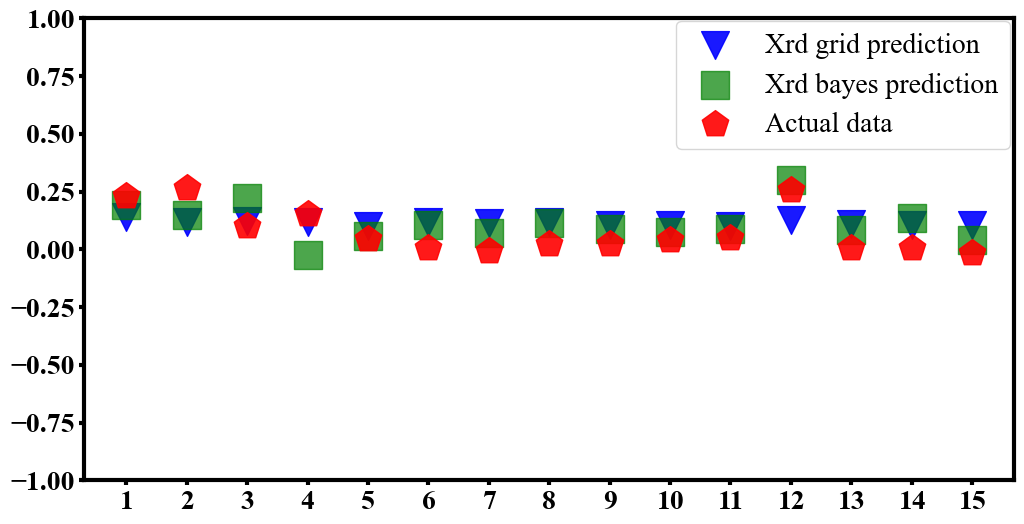

In [362]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(Xrd_grid_f)), Xrd_grid_f, color='blue',marker = "v",alpha=0.9,s=400,label='Xrd grid prediction')
plt.scatter(range(len(Xrd_bayes_f)), Xrd_bayes_f, color='green',marker = 's',s=400,alpha=0.7,label='Xrd bayes prediction')
plt.scatter(range(len(y_test_f)), y_test_f, color='red',marker = "p",s=400,alpha=0.9,label='Actual data')
plt.title('',fontname="Times New Roman", size=30,fontweight="bold")
plt.xlabel('Test structure number',fontname="Times New Roman", size=30,fontweight="bold")
plt.ylabel('Formation energy(eV/atom)',fontname="Times New Roman", size=30,fontweight="bold")
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.axes.xaxis.set_ticklabels([])

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':30})
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
ax.tick_params(axis='both', which='major', labelsize=20, width=3)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
plt.legend( fontsize=20, bbox_to_anchor=(0.6368, .856), loc='center left', borderaxespad=0)

plt.ylim([-1, 1])
plt.savefig("XRD_formation.png",dpi=1200)

In [269]:
Sine_grid_f

array([-0.1375177 ,  0.08277443, -0.00391783,  0.0598222 , -0.13753357,
       -0.13733678, -0.13867312, -0.13733678, -0.13792209,  0.1034359 ,
       -0.13733678,  0.00292713, -0.13828819, -0.11576415,  0.00881278])

In [270]:
 Sine_bayes_f

array([-0.14573808,  0.08982984, -0.0327567 ,  0.05159401, -0.15573971,
       -0.13839629, -0.1646317 , -0.13839629, -0.16120984,  0.09241614,
       -0.13840552,  0.04362035, -0.1641963 , -0.0729967 ,  0.01605429])

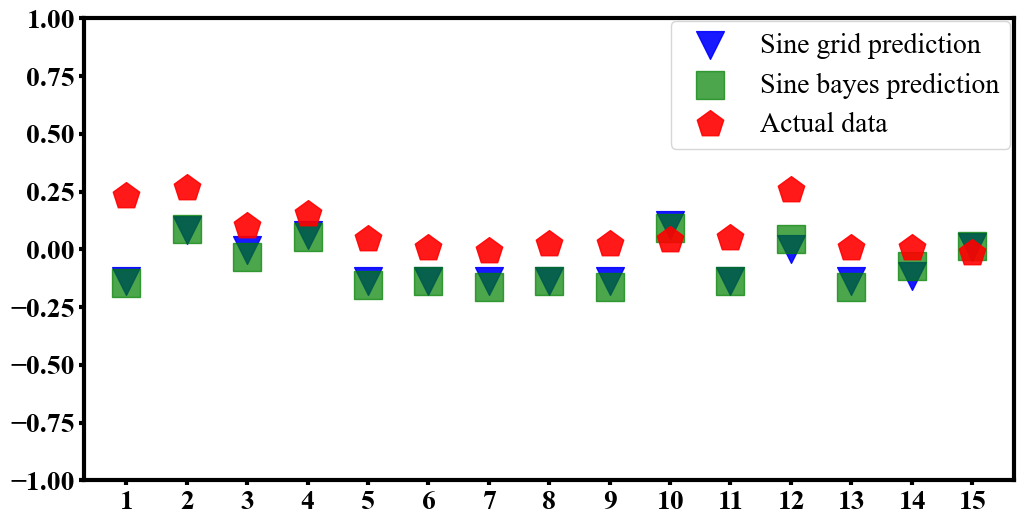

In [363]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(Sine_grid_f)), Sine_grid_f, color='blue',marker = "v",alpha=0.9,s=400,label='Sine grid prediction')
plt.scatter(range(len(Sine_bayes_f)), Sine_bayes_f, color='green',marker = 's',s=400,alpha=0.7,label='Sine bayes prediction')
plt.scatter(range(len(y_test_f)), y_test_f, color='red',marker = "p",s=400,alpha=0.9,label='Actual data')
plt.title('',fontname="Times New Roman", size=30,fontweight="bold")
plt.xlabel('',fontname="Times New Roman", size=30,fontweight="bold")
plt.ylabel('',fontname="Times New Roman", size=30,fontweight="bold")
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.axes.xaxis.set_ticklabels([])

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':30})
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
ax.tick_params(axis='both', which='major', labelsize=20, width=3)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
plt.legend( fontsize=20, bbox_to_anchor=(0.630868, .856), loc='center left', borderaxespad=0)

plt.ylim([-1, 1])
plt.savefig("Sine_formation.png",dpi=1200)

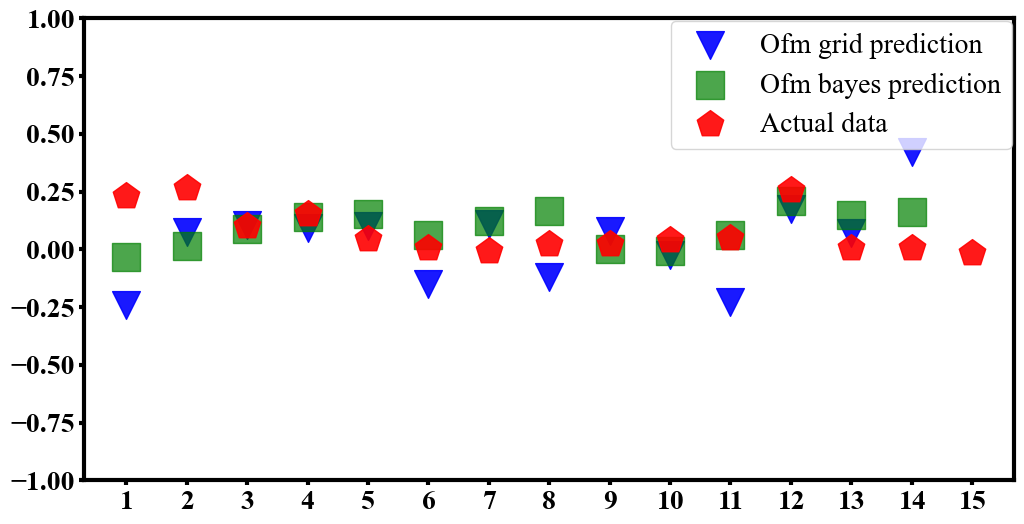

In [364]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(Ofm_grid_f)), Ofm_grid_f, color='blue',marker = "v",alpha=0.9,s=400,label='Ofm grid prediction')
plt.scatter(range(len(Ofm_bayes_f)), Ofm_bayes_f, color='green',marker = 's',s=400,alpha=0.7,label='Ofm bayes prediction')
plt.scatter(range(len(y_test_f)), y_test_f, color='red',marker = "p",s=400,alpha=0.9,label='Actual data')
plt.title('',fontname="Times New Roman", size=30,fontweight="bold")
plt.xlabel('',fontname="Times New Roman", size=30,fontweight="bold")
plt.ylabel('',fontname="Times New Roman", size=30,fontweight="bold")
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.axes.xaxis.set_ticklabels([])

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':30})
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
ax.tick_params(axis='both', which='major', labelsize=20, width=3)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
plt.legend( fontsize=20, bbox_to_anchor=(0.630868, .856), loc='center left', borderaxespad=0)

plt.ylim([-1, 1])
plt.savefig("Ofm_formation.png",dpi=1200)

In [273]:
Xrd_bayes_p

array([0.25336645, 0.43910227, 0.51683132, 0.60063558, 0.25427802,
       0.36038926, 0.35646287, 0.3399385 , 0.29736581, 0.35239803,
       0.24451398, 0.40878821, 0.33718241, 0.34606791, 0.48157371])

In [274]:
Xrd_grid_p

array([0.28108347, 0.47937824, 0.48021304, 0.47939838, 0.31321866,
       0.47082691, 0.43556253, 0.47645078, 0.37204341, 0.45459874,
       0.28602108, 0.47588655, 0.41461942, 0.45033311, 0.48388638])

In [275]:
y_test_p

array([0.24655708, 0.43933516, 0.4808028 , 0.80417433, 0.26830865,
       0.37705244, 0.41471866, 0.33803019, 0.32852738, 0.42899385,
       0.25271395, 0.52616095, 0.38548251, 0.42039755, 0.61982707])

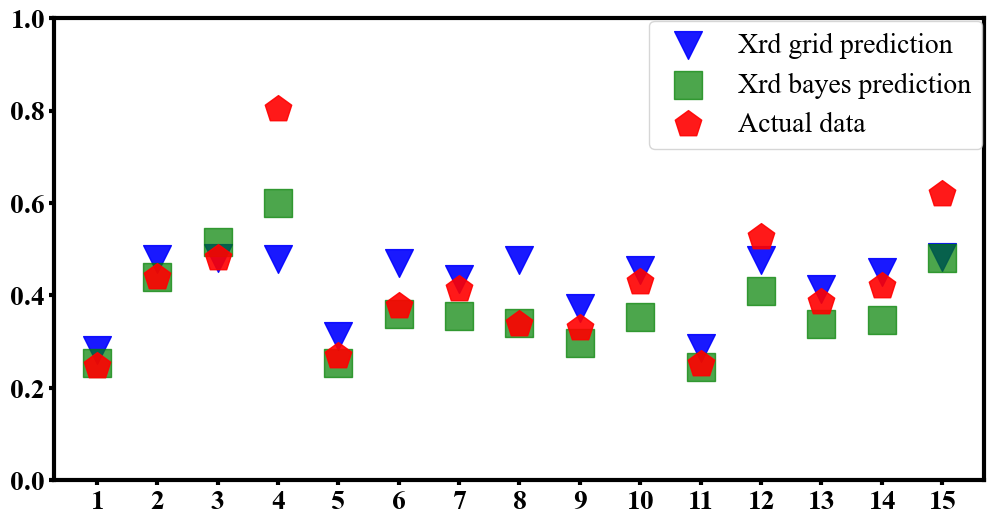

In [365]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(Xrd_grid_p)), Xrd_grid_p, color='blue',marker = "v",alpha=0.9,s=400,label='Xrd grid prediction')
plt.scatter(range(len(Xrd_bayes_p)), Xrd_bayes_p, color='green',marker = 's',s=400,alpha=0.7,label='Xrd bayes prediction')
plt.scatter(range(len(y_test_p)), y_test_p, color='red',marker = "p",s=400,alpha=0.9,label='Actual data')
plt.title('',fontname="Times New Roman", size=30,fontweight="bold")
plt.xlabel('',fontname="Times New Roman", size=30,fontweight="bold")
plt.ylabel('',fontname="Times New Roman", size=30,fontweight="bold")
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.axes.xaxis.set_ticklabels([])

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':30})
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
ax.tick_params(axis='both', which='major', labelsize=20, width=3)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
plt.legend( fontsize=20, bbox_to_anchor=(0.63952868, .856), loc='center left', borderaxespad=0)

plt.ylim([0, 1])
plt.savefig("XRD_packing.png",dpi=1200)

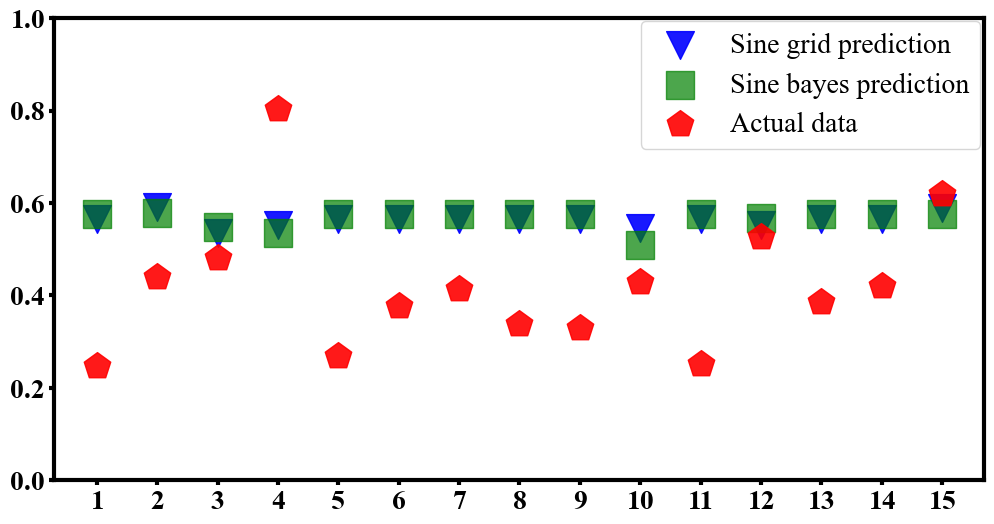

In [366]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(Sine_grid_p)), Sine_grid_p, color='blue',marker = "v",alpha=0.9,s=400,label='Sine grid prediction')
plt.scatter(range(len(Sine_bayes_p)), Sine_bayes_p, color='green',marker = 's',s=400,alpha=0.7,label='Sine bayes prediction')
plt.scatter(range(len(y_test_p)), y_test_p, color='red',marker = "p",s=400,alpha=0.9,label='Actual data')
plt.title('',fontname="Times New Roman", size=30,fontweight="bold")
plt.xlabel('',fontname="Times New Roman", size=30,fontweight="bold")
plt.ylabel('',fontname="Times New Roman", size=30,fontweight="bold")
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.axes.xaxis.set_ticklabels([])

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':30})
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
ax.tick_params(axis='both', which='major', labelsize=20, width=3)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
plt.legend( fontsize=20, bbox_to_anchor=(0.630468, .856), loc='center left', borderaxespad=0)

plt.ylim([0, 1])
plt.savefig("Sine_packing.png",dpi=1200)

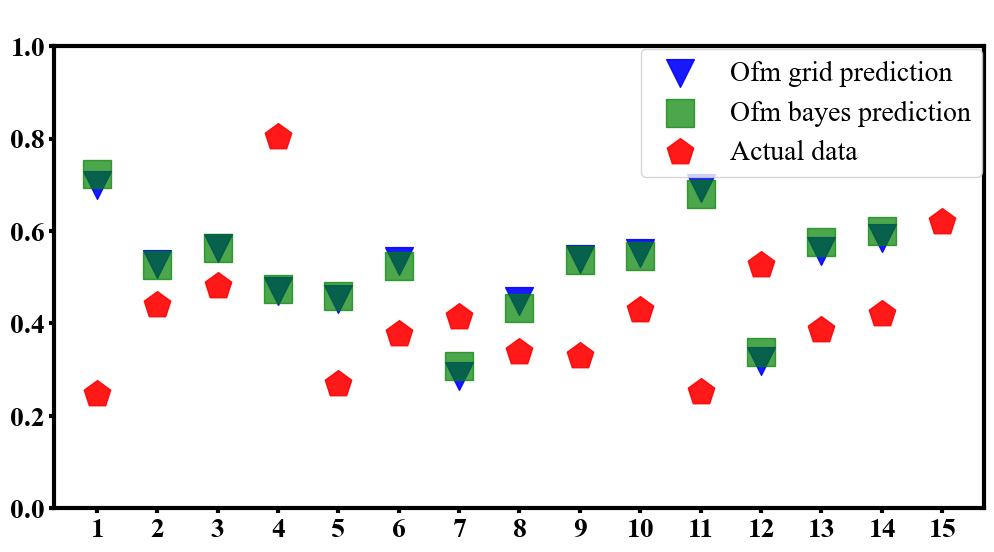

In [367]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(Ofm_grid_p)),Ofm_grid_p, color='blue',marker = "v",alpha=0.9,s=400,label='Ofm grid prediction')
plt.scatter(range(len(Ofm_bayes_p)), Ofm_bayes_p, color='green',marker = 's',s=400,alpha=0.7,label='Ofm bayes prediction')
plt.scatter(range(len(y_test_p)), y_test_p, color='red',marker = "p",s=400,alpha=0.9,label='Actual data')
plt.title(' ',fontname="Times New Roman", size=30,fontweight="bold")
plt.xlabel('',fontname="Times New Roman", size=30,fontweight="bold")
plt.ylabel('',fontname="Times New Roman", size=30,fontweight="bold")
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.axes.xaxis.set_ticklabels([])

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':30})
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
ax.tick_params(axis='both', which='major', labelsize=20, width=3)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
plt.legend( fontsize=20, bbox_to_anchor=(0.630468, .856), loc='center left', borderaxespad=0)

plt.ylim([0, 1])
plt.savefig("OFM_packing.png",dpi=1200)

In [279]:
Xrd_grid_e

array([-5.17767713, -4.16190666, -4.36663373, -2.70261808, -5.43364532,
       -5.11283122, -5.24726037, -5.1597432 , -5.2421635 , -4.92932739,
       -5.35032374, -4.80599351, -5.20627101, -5.28974233, -3.34126874])

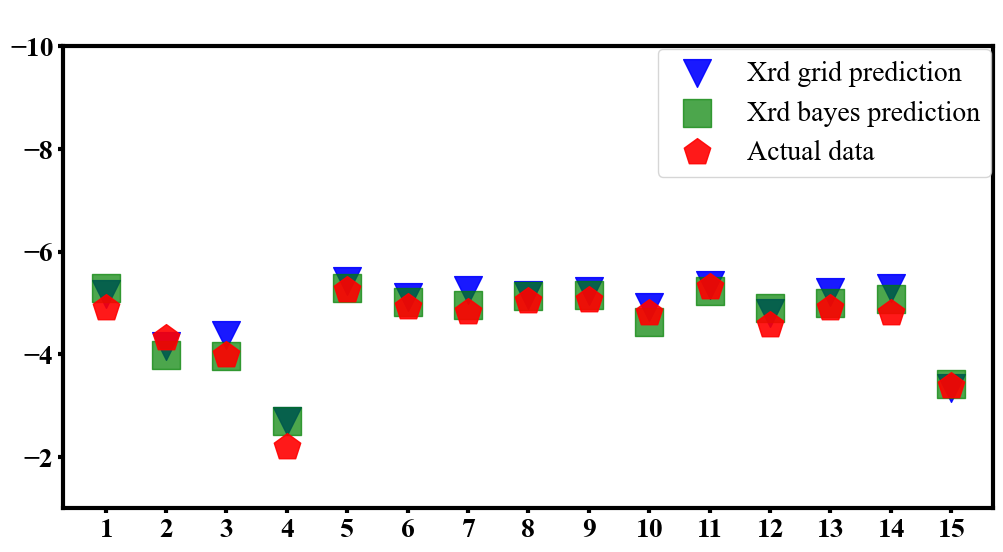

In [368]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(Xrd_grid_e)), Xrd_grid_e, color='blue',marker = "v",alpha=0.9,s=400,label='Xrd grid prediction')
plt.scatter(range(len(Xrd_bayes_e)), Xrd_bayes_e, color='green',marker = 's',s=400,alpha=0.7,label='Xrd bayes prediction')
plt.scatter(range(len(y_test_e)), y_test_e, color='red',marker = "p",s=400,alpha=0.9,label='Actual data')
plt.title(' ',fontname="Times New Roman", size=30,fontweight="bold")
plt.xlabel('',fontname="Times New Roman", size=30,fontweight="bold")
plt.ylabel('',fontname="Times New Roman", size=30,fontweight="bold")
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.axes.xaxis.set_ticklabels([])

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':30})
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
ax.tick_params(axis='both', which='major', labelsize=20, width=3)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
plt.legend( fontsize=20, bbox_to_anchor=(0.6390168, .856), loc='center left', borderaxespad=0)

plt.ylim([-1, -10])
plt.savefig("XRD_gibbs.png",dpi=1200)

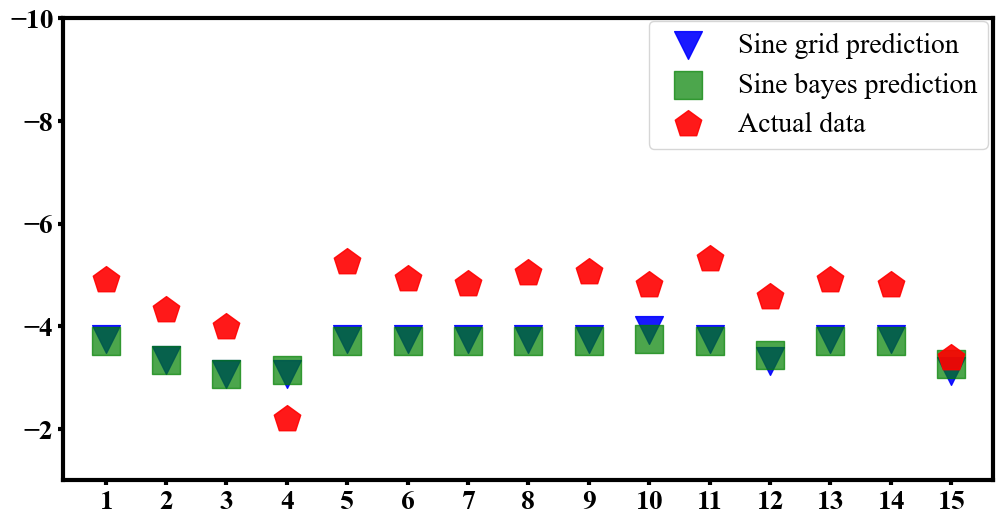

In [369]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(Sine_grid_e)), Sine_grid_e, color='blue',marker = "v",alpha=0.9,s=400,label='Sine grid prediction')
plt.scatter(range(len(Sine_bayes_e)), Sine_bayes_e, color='green',marker = 's',s=400,alpha=0.7,label='Sine bayes prediction')
plt.scatter(range(len(y_test_e)), y_test_e, color='red',marker = "p",s=400,alpha=0.9,label='Actual data')
plt.title('',fontname="Times New Roman", size=30,fontweight="bold")
plt.xlabel('',fontname="Times New Roman", size=30,fontweight="bold")
plt.ylabel('',fontname="Times New Roman", size=30,fontweight="bold")
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.axes.xaxis.set_ticklabels([])

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':30})
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
ax.tick_params(axis='both', which='major', labelsize=20, width=3)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
plt.legend( fontsize=20, bbox_to_anchor=(0.629390168, .856), loc='center left', borderaxespad=0)

plt.ylim([-1, -10])
plt.savefig("Sine_gibbs.png",dpi=1200)

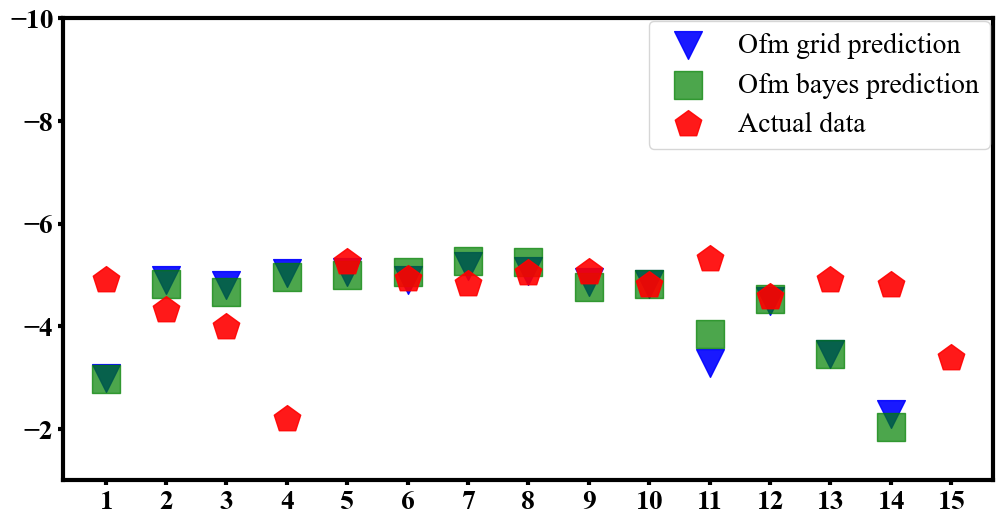

In [370]:
plt.figure(figsize=(12,6))
plt.scatter(range(len(Ofm_grid_e)), Ofm_grid_e, color='blue',marker = "v",alpha=0.9,s=400,label='Ofm grid prediction')
plt.scatter(range(len(Ofm_bayes_e)), Ofm_bayes_e, color='green',marker = 's',s=400,alpha=0.7,label='Ofm bayes prediction')
plt.scatter(range(len(y_test_e)), y_test_e, color='red',marker = "p",s=400,alpha=0.9,label='Actual data')
plt.title('',fontname="Times New Roman", size=30,fontweight="bold")
plt.xlabel('',fontname="Times New Roman", size=30,fontweight="bold")
plt.ylabel('',fontname="Times New Roman", size=30,fontweight="bold")
ax = plt.gca()
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3)
ax.axes.xaxis.set_ticklabels([])

plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size':30})
ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
ax.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15'])
ax.tick_params(axis='both', which='major', labelsize=20, width=3)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontweight('bold')
plt.legend( fontsize=20, bbox_to_anchor=(0.629390168, .856), loc='center left', borderaxespad=0)

plt.ylim([-1, -10])
plt.savefig("ofm_gibbs.png",dpi=1200)

# Skewness_result

# XRD

# Formation_energy

In [211]:
df=pd.read_csv('Xrd_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,0.003249,0.003210,0.003192,0.003604,0.004365,0.004365
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,0.000506,0.000666,0.001360,0.001956,0.001856,0.001162
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,0.001145,0.002367,0.004537,0.005994,0.005207,0.002917


In [212]:
df = df.loc[~((df['Class_name'] == 'Mgbased') & (df['e_above_hull'] >0.2))]
df

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,3.248719e-03,3.209846e-03,3.191943e-03,3.603863e-03,4.364877e-03,4.365354e-03
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,5.057440e-04,6.659170e-04,1.359716e-03,1.955682e-03,1.855699e-03,1.162167e-03
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,1.145214e-03,2.367250e-03,4.537339e-03,5.994360e-03,5.206598e-03,2.917015e-03
3,mp-27930,Li7Si2,-2.904238,Full Formula (Li28 Si8)\nReduced Formula: Li7S...,0.029674,0.0000,-0.214322,orthorhombic,-104.552560,1,...,0.003718,0.002883,0.002181,0.001723,1.791117e-03,2.364931e-03,2.629422e-03,2.153585e-03,1.433836e-03,8.283000e-04
4,mp-672287,Li13Si4,-2.987046,Full Formula (Li26 Si8)\nReduced Formula: Li13...,0.000000,0.0000,-0.251190,orthorhombic,-101.559573,1,...,0.005844,0.004186,0.002611,0.001576,1.250670e-03,1.140817e-03,7.951480e-04,3.545280e-04,9.600000e-05,1.550000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,mp-2699,CaSi2,-4.657817,Full Formula (Ca2 Si4)\nReduced Formula: CaSi2...,0.006962,0.0000,-0.375736,trigonal,-27.946902,5,...,0.009599,0.006740,0.004403,0.004014,3.998245e-03,2.756705e-03,1.150738e-03,2.843040e-04,4.140000e-05,3.560000e-06
726,mp-1191474,CaSi,-3.997867,Full Formula (Ca12 Si12)\nReduced Formula: CaS...,0.256057,0.0000,-0.286441,orthorhombic,-95.948817,5,...,0.002449,0.002764,0.003002,0.002557,1.987795e-03,1.811769e-03,1.719238e-03,1.500834e-03,1.380438e-03,1.172966e-03
727,mp-862,CaSi2,-4.654099,Full Formula (Ca2 Si4)\nReduced Formula: CaSi2...,0.010680,0.0000,-0.372017,tetragonal,-27.924592,5,...,0.003304,0.000846,0.000125,0.000011,5.200000e-07,1.460000e-08,2.330000e-10,2.130000e-12,1.110000e-14,3.310000e-17
728,mp-29013,Ca14Si19,-4.435935,Full Formula (Ca28 Si38)\nReduced Formula: Ca1...,0.004741,0.0484,-0.465120,trigonal,-292.771722,5,...,0.000586,0.000932,0.001409,0.001777,1.963819e-03,1.811893e-03,1.471467e-03,1.001554e-03,4.524210e-04,1.154370e-04


In [213]:
df = df.reset_index(drop=True)

In [214]:
df

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,3.248719e-03,3.209846e-03,3.191943e-03,3.603863e-03,4.364877e-03,4.365354e-03
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,5.057440e-04,6.659170e-04,1.359716e-03,1.955682e-03,1.855699e-03,1.162167e-03
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,1.145214e-03,2.367250e-03,4.537339e-03,5.994360e-03,5.206598e-03,2.917015e-03
3,mp-27930,Li7Si2,-2.904238,Full Formula (Li28 Si8)\nReduced Formula: Li7S...,0.029674,0.0000,-0.214322,orthorhombic,-104.552560,1,...,0.003718,0.002883,0.002181,0.001723,1.791117e-03,2.364931e-03,2.629422e-03,2.153585e-03,1.433836e-03,8.283000e-04
4,mp-672287,Li13Si4,-2.987046,Full Formula (Li26 Si8)\nReduced Formula: Li13...,0.000000,0.0000,-0.251190,orthorhombic,-101.559573,1,...,0.005844,0.004186,0.002611,0.001576,1.250670e-03,1.140817e-03,7.951480e-04,3.545280e-04,9.600000e-05,1.550000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,mp-2699,CaSi2,-4.657817,Full Formula (Ca2 Si4)\nReduced Formula: CaSi2...,0.006962,0.0000,-0.375736,trigonal,-27.946902,5,...,0.009599,0.006740,0.004403,0.004014,3.998245e-03,2.756705e-03,1.150738e-03,2.843040e-04,4.140000e-05,3.560000e-06
355,mp-1191474,CaSi,-3.997867,Full Formula (Ca12 Si12)\nReduced Formula: CaS...,0.256057,0.0000,-0.286441,orthorhombic,-95.948817,5,...,0.002449,0.002764,0.003002,0.002557,1.987795e-03,1.811769e-03,1.719238e-03,1.500834e-03,1.380438e-03,1.172966e-03
356,mp-862,CaSi2,-4.654099,Full Formula (Ca2 Si4)\nReduced Formula: CaSi2...,0.010680,0.0000,-0.372017,tetragonal,-27.924592,5,...,0.003304,0.000846,0.000125,0.000011,5.200000e-07,1.460000e-08,2.330000e-10,2.130000e-12,1.110000e-14,3.310000e-17
357,mp-29013,Ca14Si19,-4.435935,Full Formula (Ca28 Si38)\nReduced Formula: Ca1...,0.004741,0.0484,-0.465120,trigonal,-292.771722,5,...,0.000586,0.000932,0.001409,0.001777,1.963819e-03,1.811893e-03,1.471467e-03,1.001554e-03,4.524210e-04,1.154370e-04


In [215]:

X_train=df.iloc[:,14:]



X_train

y_train=df['formation_energy_per_atom']



y_train
df=pd.read_csv('xrd_test_mp.csv')
X_test=df.iloc[:,14:]



X_test
y_test=df['formation_energy_per_atom']



y_test

0     0.230665
1     0.266744
2     0.101140
3     0.153140
4     0.045772
5     0.005531
6    -0.007563
7     0.020981
8     0.023216
9     0.038142
10    0.050058
11    0.257998
12    0.003902
13    0.004213
14   -0.016207
Name: formation_energy_per_atom, dtype: float64

In [218]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [180]:

params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.550613330275253
OrderedDict([('C', 43.98139503202982), ('epsilon', 2.039577492677281e-06), ('gamma', 0.00015760882734503523), ('kernel', 'rbf')])


In [219]:
model = svm.SVR(C= 43.98139503202982,kernel='rbf',gamma=0.00015760882734503523,epsilon=2.039577492677281e-06)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.012 (0.013)
RMSE :  0.059985
RMSE1 :  0.164115


In [391]:
import math
num=0.012  
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.10954451150103323


# packing_fraction_prediction

In [182]:
df=pd.read_csv('Xrd_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,0.003249,0.003210,0.003192,0.003604,0.004365,0.004365
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,0.000506,0.000666,0.001360,0.001956,0.001856,0.001162
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,0.001145,0.002367,0.004537,0.005994,0.005207,0.002917


In [184]:
df = df.loc[~((df['Class_name'] == 'Mgbased') & (df['e_above_hull'] >0.2))]
df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,0.003249,0.003210,0.003192,0.003604,0.004365,0.004365
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,0.000506,0.000666,0.001360,0.001956,0.001856,0.001162
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,0.001145,0.002367,0.004537,0.005994,0.005207,0.002917


In [185]:
df = df.reset_index(drop=True)

In [186]:
X_train=df.iloc[:,14:]



X_train

y_train=df['packing fraction']



y_train
df=pd.read_csv('xrd_test_mp.csv')
X_test=df.iloc[:,14:]



X_test
y_test=df['packing fraction']



y_test

0     0.246557
1     0.439335
2     0.480803
3     0.804174
4     0.268309
5     0.377052
6     0.414719
7     0.338030
8     0.328527
9     0.428994
10    0.252714
11    0.526161
12    0.385483
13    0.420398
14    0.619827
Name: packing fraction, dtype: float64

In [187]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.8649507969170352
OrderedDict([('C', 600.0), ('epsilon', 0.005354011286248393), ('gamma', 0.00014578070263138504), ('kernel', 'rbf')])


In [188]:
model = svm.SVR(C= 600,kernel='rbf',gamma=0.00014578070263138504,epsilon= 0.005354011286248393)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.001 (0.001)
RMSE :  0.004751
RMSE1 :  0.084938


In [390]:
import math
num=0.001  
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.03162277660168379


# energy_per_atom

In [189]:
df=pd.read_csv('Xrd_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,0.003249,0.003210,0.003192,0.003604,0.004365,0.004365
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,0.000506,0.000666,0.001360,0.001956,0.001856,0.001162
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,0.001145,0.002367,0.004537,0.005994,0.005207,0.002917


In [190]:
df = df.loc[~((df['Class_name'] == 'Mgbased') & (df['e_above_hull'] >0.2))]
df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,0.003249,0.003210,0.003192,0.003604,0.004365,0.004365
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,0.000506,0.000666,0.001360,0.001956,0.001856,0.001162
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,0.001145,0.002367,0.004537,0.005994,0.005207,0.002917


In [191]:
df = df.reset_index(drop=True)

In [192]:
X_train=df.iloc[:,14:]



X_train

y_train=df['energy_per_atom']



y_train
df=pd.read_csv('xrd_test_mp.csv')
X_test=df.iloc[:,14:]



X_test
y_test=df['energy_per_atom']



y_test

0    -4.900932
1    -4.317739
2    -3.979999
3    -2.186875
4    -5.260157
5    -4.921684
6    -4.814278
7    -5.035341
8    -5.066836
9    -4.797939
10   -5.313751
11   -4.578083
12   -4.892416
13   -4.810115
14   -3.384014
Name: energy_per_atom, dtype: float64

In [193]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.8562032632634378
OrderedDict([('C', 145.08096558282043), ('epsilon', 6.748768906729976e-06), ('gamma', 0.00017599837794165854), ('kernel', 'rbf')])


In [195]:
model = svm.SVR(C= 145.08096558282043,kernel='rbf',gamma=0.00017599837794165854,epsilon=6.748768906729976e-06)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X0.12_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.062 (0.026)
RMSE :  0.120474
RMSE1 :  0.476168


In [387]:
import math
num=0.062 
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.24899799195977465


# SIne_coulmb_matrix
formation_energy

In [197]:
df=pd.read_csv('Sine_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,sine coulomb matrix eig 142,sine coulomb matrix eig 143,sine coulomb matrix eig 144,sine coulomb matrix eig 145,sine coulomb matrix eig 146,sine coulomb matrix eig 147,sine coulomb matrix eig 148,sine coulomb matrix eig 149,sine coulomb matrix eig 150,sine coulomb matrix eig 151
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [198]:
df = df.loc[~((df['Class_name'] == 'Mgbased') & (df['e_above_hull'] >0.2))]
df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,sine coulomb matrix eig 142,sine coulomb matrix eig 143,sine coulomb matrix eig 144,sine coulomb matrix eig 145,sine coulomb matrix eig 146,sine coulomb matrix eig 147,sine coulomb matrix eig 148,sine coulomb matrix eig 149,sine coulomb matrix eig 150,sine coulomb matrix eig 151
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
df = df.reset_index(drop=True)

In [200]:
X_train=df.iloc[:,14:]



X_train
y_train=df['formation_energy_per_atom']


y_train

0     -0.213654
1      0.007188
2     -0.227533
3     -0.214322
4     -0.251190
         ...   
354    0.011495
355    0.072495
356    0.523568
357    0.314983
358    0.337543
Name: formation_energy_per_atom, Length: 359, dtype: float64

In [201]:
df=pd.read_csv('sine_mp_test.csv')


X_test=df.iloc[:,14:]



X_test
y_test=df['formation_energy_per_atom']




y_test

0     0.230665
1     0.266744
2     0.101140
3     0.153140
4     0.045772
5     0.005531
6    -0.007563
7     0.020981
8     0.023216
9     0.038142
10    0.050058
11    0.257998
12    0.003902
13    0.004213
14   -0.016207
Name: formation_energy_per_atom, dtype: float64

In [202]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.37503603256349893
OrderedDict([('C', 0.5813834029267732), ('epsilon', 0.011554748279473729), ('gamma', 0.06100124458773761), ('kernel', 'rbf')])


In [203]:
model = svm.SVR(C= 0.5813834029267732,kernel='rbf',gamma= 0.06100124458773761,epsilon=0.011554748279473729)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.015 (0.012)
RMSE :  0.091159
RMSE1 :  0.161736


In [386]:
import math
num=0.015 
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.1224744871391589


# packing_fraction

In [205]:
df=pd.read_csv('Sine_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,sine coulomb matrix eig 142,sine coulomb matrix eig 143,sine coulomb matrix eig 144,sine coulomb matrix eig 145,sine coulomb matrix eig 146,sine coulomb matrix eig 147,sine coulomb matrix eig 148,sine coulomb matrix eig 149,sine coulomb matrix eig 150,sine coulomb matrix eig 151
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
df = df.loc[~((df['Class_name'] == 'Mgbased') & (df['e_above_hull'] >0.2))]
df.head(3)
df = df.reset_index(drop=True)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,sine coulomb matrix eig 142,sine coulomb matrix eig 143,sine coulomb matrix eig 144,sine coulomb matrix eig 145,sine coulomb matrix eig 146,sine coulomb matrix eig 147,sine coulomb matrix eig 148,sine coulomb matrix eig 149,sine coulomb matrix eig 150,sine coulomb matrix eig 151
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [207]:
df = df.reset_index(drop=True)

In [208]:
X_train=df.iloc[:,14:]



X_train
y_train=df['packing fraction']


y_train

0      0.619978
1      0.375498
2      0.744183
3      0.748824
4      0.718573
         ...   
354    0.272848
355    0.262668
356    0.377327
357    0.291104
358    0.236808
Name: packing fraction, Length: 359, dtype: float64

In [209]:
df=pd.read_csv('sine_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['packing fraction']




y_test

0     0.246557
1     0.439335
2     0.480803
3     0.804174
4     0.268309
5     0.377052
6     0.414719
7     0.338030
8     0.328527
9     0.428994
10    0.252714
11    0.526161
12    0.385483
13    0.420398
14    0.619827
Name: packing fraction, dtype: float64

In [210]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [211]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.7556625318997352
OrderedDict([('C', 0.5341223110608262), ('epsilon', 0.01093439308161429), ('gamma', 0.19263136370227923), ('kernel', 'rbf')])


In [212]:
model = svm.SVR(C= 0.5341223110608262,kernel='rbf',gamma= 0.19263136370227923,epsilon=0.01093439308161429)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.002 (0.001)
RMSE :  0.025023
RMSE1 :  0.207357


In [385]:
import math
num=0.002
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.044721359549995794


# Gibbs free energy


In [232]:
df=pd.read_csv('Sine_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,sine coulomb matrix eig 142,sine coulomb matrix eig 143,sine coulomb matrix eig 144,sine coulomb matrix eig 145,sine coulomb matrix eig 146,sine coulomb matrix eig 147,sine coulomb matrix eig 148,sine coulomb matrix eig 149,sine coulomb matrix eig 150,sine coulomb matrix eig 151
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [233]:
df = df.loc[~((df['Class_name'] == 'Mgbased') & (df['e_above_hull'] >0.2))]
df.head(3)
df = df.reset_index(drop=True)

In [234]:
X_train=df.iloc[:,14:]



X_train
y_train=df['energy_per_atom']


y_train

0     -3.294066
1     -3.658968
2     -2.812315
3     -2.904238
4     -2.987046
         ...   
354   -5.411895
355   -5.350895
356   -4.899823
357   -5.108408
358   -5.085848
Name: energy_per_atom, Length: 359, dtype: float64

In [235]:
df=pd.read_csv('sine_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['energy_per_atom']




y_test

0    -4.900932
1    -4.317739
2    -3.979999
3    -2.186875
4    -5.260157
5    -4.921684
6    -4.814278
7    -5.035341
8    -5.066836
9    -4.797939
10   -5.313751
11   -4.578083
12   -4.892416
13   -4.810115
14   -3.384014
Name: energy_per_atom, dtype: float64

In [236]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [221]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.8284063872090033
OrderedDict([('C', 600.0), ('epsilon', 0.00019996967578188855), ('gamma', 2.7822719111549485), ('kernel', 'rbf')])


In [384]:
def to_exponential(num):
    return '{:e}'.format(num)
to_exponential(0.00019996967578188855)

'1.999697e-04'

In [237]:
model = svm.SVR(C= 600.0,kernel='rbf',gamma=  2.7822719111549485,epsilon=0.00019996967578188855)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.076 (0.035)
RMSE :  0.055012
RMSE1 :  1.240203


In [383]:
import math
num=0.076 
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.27568097504180444


# Orbital_field_matrix

In [4]:
df=pd.read_csv('orbital_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,OFM: f^14 - f^5,OFM: f^14 - f^6,OFM: f^14 - f^7,OFM: f^14 - f^8,OFM: f^14 - f^9,OFM: f^14 - f^10,OFM: f^14 - f^11,OFM: f^14 - f^12,OFM: f^14 - f^13,OFM: f^14 - f^14
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0,0,0,0,0,0,0,0,0,0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0,0,0,0,0,0,0,0,0,0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0,0,0,0,0,0,0,0,0,0


In [225]:
df = df.loc[~((df['Class_name'] == 'Mgbased') & (df['e_above_hull'] >0.2))]
df.head(3)
df = df.reset_index(drop=True)

In [226]:
X_train=df.iloc[:,14:]



X_train
y_train=df['formation_energy_per_atom']


y_train

0     -0.213654
1      0.007188
2     -0.227533
3     -0.214322
4     -0.251190
         ...   
354    0.011495
355    0.072495
356    0.523568
357    0.314983
358    0.337543
Name: formation_energy_per_atom, Length: 359, dtype: float64

In [228]:
df=pd.read_csv('Orbital_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['formation_energy_per_atom']




y_test

0     0.153140
1     0.005531
2    -0.007563
3     0.020981
4     0.023216
5     0.038142
6     0.050058
7     0.257998
8     0.003902
9     0.004213
10   -0.016207
11    0.230665
12    0.266744
13    0.101140
Name: formation_energy_per_atom, dtype: float64

In [229]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [230]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

C:\Users\JOYDATTA\anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


0.42425575157538103
OrderedDict([('C', 2.6774936135466283), ('epsilon', 7.0220733662899515e-06), ('gamma', 0.20690210143774546), ('kernel', 'rbf')])


In [231]:
model = svm.SVR(C= 2.6774936135466283,kernel='rbf',gamma=0.20690210143774546,epsilon=7.0220733662899515e-06)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.014 (0.008)
RMSE :  0.090810
RMSE1 :  0.116683


In [381]:
import math
num=0.014
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.11832159566199232


# packing fraction

In [238]:
df=pd.read_csv('orbital_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,OFM: f^14 - f^5,OFM: f^14 - f^6,OFM: f^14 - f^7,OFM: f^14 - f^8,OFM: f^14 - f^9,OFM: f^14 - f^10,OFM: f^14 - f^11,OFM: f^14 - f^12,OFM: f^14 - f^13,OFM: f^14 - f^14
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0,0,0,0,0,0,0,0,0,0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0,0,0,0,0,0,0,0,0,0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0,0,0,0,0,0,0,0,0,0


In [239]:
df = df.loc[~((df['Class_name'] == 'Mgbased') & (df['e_above_hull'] >0.2))]
df.head(3)
df = df.reset_index(drop=True)

In [240]:
X_train=df.iloc[:,14:]



X_train
y_train=df['packing fraction']


y_train

0      0.619978
1      0.375498
2      0.744183
3      0.748824
4      0.718573
         ...   
354    0.272848
355    0.262668
356    0.377327
357    0.291104
358    0.236808
Name: packing fraction, Length: 359, dtype: float64

In [241]:
df=pd.read_csv('Orbital_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['packing fraction']




y_test

0     0.804174
1     0.377052
2     0.414719
3     0.338030
4     0.328527
5     0.428994
6     0.252714
7     0.526161
8     0.385483
9     0.420398
10    0.619827
11    0.246557
12    0.439335
13    0.480803
Name: packing fraction, dtype: float64

In [242]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [243]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.8873600487806154
OrderedDict([('C', 7.800253097493293), ('epsilon', 0.01161429762446919), ('gamma', 0.20104384114906393), ('kernel', 'rbf')])


In [244]:
model = svm.SVR(C= 7.800253097493293,kernel='rbf',gamma=0.20104384114906393,epsilon=0.01161429762446919)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.001 (0.001)
RMSE :  0.017462
RMSE1 :  0.135206


In [382]:
import math
num=0.0010
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.03162277660168379


# gibbs_free_enegry


In [19]:
df=pd.read_csv('orbital_MP_train.csv')


df

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,OFM: f^14 - f^5,OFM: f^14 - f^6,OFM: f^14 - f^7,OFM: f^14 - f^8,OFM: f^14 - f^9,OFM: f^14 - f^10,OFM: f^14 - f^11,OFM: f^14 - f^12,OFM: f^14 - f^13,OFM: f^14 - f^14
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0,0,0,0,0,0,0,0,0,0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0,0,0,0,0,0,0,0,0,0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0,0,0,0,0,0,0,0,0,0
3,mp-27930,Li7Si2,-2.904238,Full Formula (Li28 Si8)\nReduced Formula: Li7S...,0.029674,0.0000,-0.214322,orthorhombic,-104.552560,1,...,0,0,0,0,0,0,0,0,0,0
4,mp-672287,Li13Si4,-2.987046,Full Formula (Li26 Si8)\nReduced Formula: Li13...,0.000000,0.0000,-0.251190,orthorhombic,-101.559573,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,mp-165,Si,-5.411895,Full Formula (Si4)\nReduced Formula: Si\nabc ...,0.011495,0.5139,0.011495,hexagonal,-21.647581,8,...,0,0,0,0,0,0,0,0,0,0
726,mp-1079297,Si,-5.350895,Full Formula (Si8)\nReduced Formula: Si\nabc ...,0.072495,0.2875,0.072495,monoclinic,-42.807162,8,...,0,0,0,0,0,0,0,0,0,0
727,mp-1014212,Si,-4.899823,Full Formula (Si1)\nReduced Formula: Si\nabc ...,0.523568,0.0000,0.523568,cubic,-4.899823,8,...,0,0,0,0,0,0,0,0,0,0
728,mp-1245242,Si,-5.108408,Full Formula (Si100)\nReduced Formula: Si\nabc...,0.314983,0.0000,0.314983,triclinic,-510.840781,8,...,0,0,0,0,0,0,0,0,0,0


In [373]:
df = df.loc[~((df['Class_name'] == 'Mgbased') & (df['e_above_hull'] >0.2))]
df.head(3)
df = df.reset_index(drop=True)

In [374]:
X_train=df.iloc[:,14:]



X_train
y_train=df['energy_per_atom']


y_train

0     -3.294066
1     -3.658968
2     -2.812315
3     -2.904238
4     -2.987046
         ...   
354   -5.411895
355   -5.350895
356   -4.899823
357   -5.108408
358   -5.085848
Name: energy_per_atom, Length: 359, dtype: float64

In [375]:
df=pd.read_csv('Orbital_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['energy_per_atom']




y_test

0    -2.186875
1    -4.921684
2    -4.814278
3    -5.035341
4    -5.066836
5    -4.797939
6    -5.313751
7    -4.578083
8    -4.892416
9    -4.810115
10   -3.384014
11   -4.900932
12   -4.317739
13   -3.979999
Name: energy_per_atom, dtype: float64

In [376]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [377]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.9251393099768294
OrderedDict([('C', 24.881650683716856), ('epsilon', 1.1295746128956395e-06), ('gamma', 0.005699303333023073), ('kernel', 'rbf')])


In [378]:
model = svm.SVR(C= 24.881650683716856,kernel='rbf',gamma=0.00569930333302307,epsilon=1.1295746128956395e-06)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.033 (0.017)
RMSE :  0.147804
RMSE1 :  0.529737


In [379]:
import math
num=0.033 
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.1816590212458495


# outliers

# formation_energy

In [604]:
df=pd.read_csv('Xrd_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,0.003249,0.003210,0.003192,0.003604,0.004365,0.004365
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,0.000506,0.000666,0.001360,0.001956,0.001856,0.001162
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,0.001145,0.002367,0.004537,0.005994,0.005207,0.002917


In [605]:

# calculate the median and the median absolute deviation (MAD) of the data
median = df['formation_energy_per_atom'].median()
MAD = df['formation_energy_per_atom'].mad()

# calculate the modified Z-scores for each data point
df['mod_z_score'] = 0.6745 * (df['formation_energy_per_atom'] - median) / MAD

# set a threshold value for the modified Z-score
mod_z_score_threshold = 3.5

# identify data points with modified Z-score > threshold
outliers = df[df['mod_z_score'].abs() > mod_z_score_threshold]

# remove rows corresponding to outliers
df = df[df['mod_z_score'].abs() <= mod_z_score_threshold]
del df['mod_z_score']

In [606]:
X_train=df.iloc[:,14:]



X_train

y_train=df['formation_energy_per_atom']



y_train
df=pd.read_csv('xrd_test_mp.csv')
X_test=df.iloc[:,14:]



X_test
y_test=df['formation_energy_per_atom']



y_test

0     0.230665
1     0.266744
2     0.101140
3     0.153140
4     0.045772
5     0.005531
6    -0.007563
7     0.020981
8     0.023216
9     0.038142
10    0.050058
11    0.257998
12    0.003902
13    0.004213
14   -0.016207
Name: formation_energy_per_atom, dtype: float64

In [607]:
X_train.shape

(709, 128)

In [273]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.6458423364949316
OrderedDict([('C', 1.0418096141855044), ('epsilon', 0.007072084736280741), ('gamma', 0.0012955865251206558), ('kernel', 'rbf')])


In [274]:
model = svm.SVR(C= 1.0418096141855044,kernel='rbf',gamma= 0.0012955865251206558,epsilon=0.007072084736280741)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.002 (0.001)
RMSE :  0.023340
RMSE1 :  0.106073


In [603]:
import math
num=0.002
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.044721359549995794


# packing_fraction

In [608]:
df=pd.read_csv('Xrd_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,0.003249,0.003210,0.003192,0.003604,0.004365,0.004365
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,0.000506,0.000666,0.001360,0.001956,0.001856,0.001162
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,0.001145,0.002367,0.004537,0.005994,0.005207,0.002917


In [609]:
df.shape

(730, 142)

In [ ]:
We also
removed 18 other outliers by applying the modified Z score method 83 shown in Figure S1.

In [610]:

# calculate the median and the median absolute deviation (MAD) of the data
median = df['packing fraction'].median()
MAD = df['packing fraction'].mad()

# calculate the modified Z-scores for each data point
df['mod_z_score'] = 0.6745 * (df['packing fraction'] - median) / MAD

# set a threshold value for the modified Z-score
mod_z_score_threshold = 3.5

# identify data points with modified Z-score > threshold
outliers = df[df['mod_z_score'].abs() > mod_z_score_threshold]

# remove rows corresponding to outliers
df = df[df['mod_z_score'].abs() <= mod_z_score_threshold]
del df['mod_z_score']

In [611]:
X_train=df.iloc[:,14:]



X_train

y_train=df['packing fraction']



y_train
df=pd.read_csv('xrd_test_mp.csv')
X_test=df.iloc[:,14:]



X_test
y_test=df['packing fraction']



y_test

0     0.246557
1     0.439335
2     0.480803
3     0.804174
4     0.268309
5     0.377052
6     0.414719
7     0.338030
8     0.328527
9     0.428994
10    0.252714
11    0.526161
12    0.385483
13    0.420398
14    0.619827
Name: packing fraction, dtype: float64

In [592]:
X_train

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,4.670000e-24,3.590000e-21,1.720000e-18,5.090000e-16,9.360000e-14,1.070000e-11,7.550000e-10,3.310000e-08,9.020000e-07,1.520000e-05,...,0.002162,0.002619,0.002953,0.003154,3.248719e-03,3.209846e-03,3.191943e-03,3.603863e-03,4.364877e-03,4.365354e-03
1,2.510000e-27,5.840000e-24,7.850000e-21,6.090000e-18,2.730000e-15,7.070000e-13,1.060000e-10,9.130000e-09,4.550000e-07,1.310000e-05,...,0.002032,0.002409,0.001991,0.001076,5.057440e-04,6.659170e-04,1.359716e-03,1.955682e-03,1.855699e-03,1.162167e-03
4,2.910000e-20,1.490000e-17,4.410000e-15,7.570000e-13,7.560000e-11,4.400000e-09,1.510000e-07,3.080000e-06,3.770000e-05,2.791700e-04,...,0.005844,0.004186,0.002611,0.001576,1.250670e-03,1.140817e-03,7.951480e-04,3.545280e-04,9.600000e-05,1.550000e-05
6,2.690000e-12,2.360000e-10,1.220000e-08,3.730000e-07,6.740000e-06,7.220000e-05,4.568350e-04,1.711593e-03,3.809839e-03,5.148569e-03,...,0.003663,0.004634,0.004444,0.003261,2.136375e-03,1.683230e-03,1.874401e-03,2.377649e-03,2.548182e-03,1.944308e-03
7,5.400000e-52,1.210000e-47,1.700000e-43,1.500000e-39,8.330000e-36,2.910000e-32,6.390000e-29,8.830000e-26,7.670000e-23,4.190000e-20,...,0.005474,0.012418,0.019372,0.019586,1.288203e-02,6.155836e-03,3.794331e-03,5.125112e-03,7.266543e-03,7.169569e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,7.830000e-13,6.050000e-11,2.760000e-09,7.420000e-08,1.170000e-06,1.100000e-05,6.040000e-05,1.957710e-04,3.743310e-04,4.218960e-04,...,0.009599,0.006740,0.004403,0.004014,3.998245e-03,2.756705e-03,1.150738e-03,2.843040e-04,4.140000e-05,3.560000e-06
726,1.820000e-16,4.510000e-14,6.290000e-12,4.930000e-10,2.170000e-08,5.420000e-07,7.790000e-06,6.760000e-05,3.908400e-04,1.691529e-03,...,0.002449,0.002764,0.003002,0.002557,1.987795e-03,1.811769e-03,1.719238e-03,1.500834e-03,1.380438e-03,1.172966e-03
727,1.130000e-62,2.090000e-57,2.190000e-52,1.310000e-47,4.430000e-43,8.510000e-39,9.290000e-35,5.760000e-31,2.030000e-27,4.050000e-24,...,0.003304,0.000846,0.000125,0.000011,5.200000e-07,1.460000e-08,2.330000e-10,2.130000e-12,1.110000e-14,3.310000e-17
728,9.680000e-26,3.610000e-22,6.600000e-19,5.930000e-16,2.620000e-13,5.670000e-11,6.040000e-09,3.160000e-07,8.110000e-06,1.022390e-04,...,0.000586,0.000932,0.001409,0.001777,1.963819e-03,1.811893e-03,1.471467e-03,1.001554e-03,4.524210e-04,1.154370e-04


In [368]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.8634613671538675
OrderedDict([('C', 257.4557517434784), ('epsilon', 0.0003457952185439735), ('gamma', 4.304821957575336e-05), ('kernel', 'rbf')])


In [370]:
model = svm.SVR(C= 257.4557517434784,kernel='rbf',gamma= 4.304821957575336e-05,epsilon=0.0003457952185439735)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.000 (0.000)
RMSE :  0.005713
RMSE1 :  0.086427


In [364]:
import math
num=0.007
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.08366600265340755


# Energy_per_atom

In [616]:
df=pd.read_csv('Xrd_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.002162,0.002619,0.002953,0.003154,0.003249,0.003210,0.003192,0.003604,0.004365,0.004365
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.002032,0.002409,0.001991,0.001076,0.000506,0.000666,0.001360,0.001956,0.001856,0.001162
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.001831,0.001643,0.001513,0.001119,0.001145,0.002367,0.004537,0.005994,0.005207,0.002917


In [617]:

# calculate the median and the median absolute deviation (MAD) of the data
median = df['energy_per_atom'].median()
MAD = df['energy_per_atom'].mad()

# calculate the modified Z-scores for each data point
df['mod_z_score'] = 0.6745 * (df['energy_per_atom'] - median) / MAD

# set a threshold value for the modified Z-score
mod_z_score_threshold = 3.5

# identify data points with modified Z-score > threshold
outliers = df[df['mod_z_score'].abs() > mod_z_score_threshold]

# remove rows corresponding to outliers
df = df[df['mod_z_score'].abs() <= mod_z_score_threshold]
del df['mod_z_score']

In [618]:
X_train=df.iloc[:,14:]



X_train

y_train=df['energy_per_atom']



y_train
df=pd.read_csv('xrd_test_mp.csv')
X_test=df.iloc[:,14:]



X_test
y_test=df['energy_per_atom']



y_test

0    -4.900932
1    -4.317739
2    -3.979999
3    -2.186875
4    -5.260157
5    -4.921684
6    -4.814278
7    -5.035341
8    -5.066836
9    -4.797939
10   -5.313751
11   -4.578083
12   -4.892416
13   -4.810115
14   -3.384014
Name: energy_per_atom, dtype: float64

In [619]:
X_train

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_118,xrd_119,xrd_120,xrd_121,xrd_122,xrd_123,xrd_124,xrd_125,xrd_126,xrd_127
0,4.670000e-24,3.590000e-21,1.720000e-18,5.090000e-16,9.360000e-14,1.070000e-11,7.550000e-10,3.310000e-08,9.020000e-07,1.520000e-05,...,0.002162,0.002619,0.002953,0.003154,3.248719e-03,3.209846e-03,3.191943e-03,3.603863e-03,4.364877e-03,4.365354e-03
1,2.510000e-27,5.840000e-24,7.850000e-21,6.090000e-18,2.730000e-15,7.070000e-13,1.060000e-10,9.130000e-09,4.550000e-07,1.310000e-05,...,0.002032,0.002409,0.001991,0.001076,5.057440e-04,6.659170e-04,1.359716e-03,1.955682e-03,1.855699e-03,1.162167e-03
2,5.800000e-11,2.790000e-09,8.150000e-08,1.450000e-06,1.560000e-05,1.018860e-04,4.045730e-04,9.753680e-04,1.427680e-03,1.268794e-03,...,0.001831,0.001643,0.001513,0.001119,1.145214e-03,2.367250e-03,4.537339e-03,5.994360e-03,5.206598e-03,2.917015e-03
3,1.910000e-20,1.130000e-17,3.830000e-15,7.400000e-13,8.170000e-11,5.160000e-09,1.860000e-07,3.860000e-06,4.590000e-05,3.140440e-04,...,0.003718,0.002883,0.002181,0.001723,1.791117e-03,2.364931e-03,2.629422e-03,2.153585e-03,1.433836e-03,8.283000e-04
4,2.910000e-20,1.490000e-17,4.410000e-15,7.570000e-13,7.560000e-11,4.400000e-09,1.510000e-07,3.080000e-06,3.770000e-05,2.791700e-04,...,0.005844,0.004186,0.002611,0.001576,1.250670e-03,1.140817e-03,7.951480e-04,3.545280e-04,9.600000e-05,1.550000e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,7.830000e-13,6.050000e-11,2.760000e-09,7.420000e-08,1.170000e-06,1.100000e-05,6.040000e-05,1.957710e-04,3.743310e-04,4.218960e-04,...,0.009599,0.006740,0.004403,0.004014,3.998245e-03,2.756705e-03,1.150738e-03,2.843040e-04,4.140000e-05,3.560000e-06
726,1.820000e-16,4.510000e-14,6.290000e-12,4.930000e-10,2.170000e-08,5.420000e-07,7.790000e-06,6.760000e-05,3.908400e-04,1.691529e-03,...,0.002449,0.002764,0.003002,0.002557,1.987795e-03,1.811769e-03,1.719238e-03,1.500834e-03,1.380438e-03,1.172966e-03
727,1.130000e-62,2.090000e-57,2.190000e-52,1.310000e-47,4.430000e-43,8.510000e-39,9.290000e-35,5.760000e-31,2.030000e-27,4.050000e-24,...,0.003304,0.000846,0.000125,0.000011,5.200000e-07,1.460000e-08,2.330000e-10,2.130000e-12,1.110000e-14,3.310000e-17
728,9.680000e-26,3.610000e-22,6.600000e-19,5.930000e-16,2.620000e-13,5.670000e-11,6.040000e-09,3.160000e-07,8.110000e-06,1.022390e-04,...,0.000586,0.000932,0.001409,0.001777,1.963819e-03,1.811893e-03,1.471467e-03,1.001554e-03,4.524210e-04,1.154370e-04


In [285]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.8672193199206394
OrderedDict([('C', 42.574332597720144), ('epsilon', 6.846842124401742e-05), ('gamma', 0.0005205878405169264), ('kernel', 'rbf')])


In [286]:
model = svm.SVR(C=  42.574332597720144,kernel='rbf',gamma= 0.0005205878405169264,epsilon=6.846842124401742e-05)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.039 (0.015)
RMSE :  0.075464
RMSE1 :  0.454983


In [363]:
import math
num=0.039
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.19748417658131498


# SIne_coulmb_matrix


In [287]:
df=pd.read_csv('Sine_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,sine coulomb matrix eig 142,sine coulomb matrix eig 143,sine coulomb matrix eig 144,sine coulomb matrix eig 145,sine coulomb matrix eig 146,sine coulomb matrix eig 147,sine coulomb matrix eig 148,sine coulomb matrix eig 149,sine coulomb matrix eig 150,sine coulomb matrix eig 151
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [303]:

# calculate the median and the median absolute deviation (MAD) of the data
median = df['formation_energy_per_atom'].median()
MAD = df['formation_energy_per_atom'].mad()

# calculate the modified Z-scores for each data point
df['mod_z_score'] = 0.6745 * (df['formation_energy_per_atom'] - median) / MAD

# set a threshold value for the modified Z-score
mod_z_score_threshold = 3.5

# identify data points with modified Z-score > threshold
outliers = df[df['mod_z_score'].abs() > mod_z_score_threshold]

# remove rows corresponding to outliers
df = df[df['mod_z_score'].abs() <= mod_z_score_threshold]
del df['mod_z_score']

In [305]:
X_train=df.iloc[:,14:]



X_train

y_train=df['formation_energy_per_atom']



y_train
df=pd.read_csv('sine_mp_test.csv')
X_test=df.iloc[:,14:]



X_test
y_test=df['formation_energy_per_atom']



y_test

0     0.230665
1     0.266744
2     0.101140
3     0.153140
4     0.045772
5     0.005531
6    -0.007563
7     0.020981
8     0.023216
9     0.038142
10    0.050058
11    0.257998
12    0.003902
13    0.004213
14   -0.016207
Name: formation_energy_per_atom, dtype: float64

In [306]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.4250106946069189
OrderedDict([('C', 0.07362898250633315), ('epsilon', 1.4875876867513227e-05), ('gamma', 0.6941249236123415), ('kernel', 'rbf')])


In [307]:
model = svm.SVR(C= 0.07362898250633315,kernel='rbf',gamma= 0.6941249236123415,epsilon= 1.4875876867513227e-05)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.003 (0.001)
RMSE :  0.039422
RMSE1 :  0.097805


In [362]:
import math
num=0.003
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.05477225575051661


# packing-fraction

In [309]:
df=pd.read_csv('Sine_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,sine coulomb matrix eig 142,sine coulomb matrix eig 143,sine coulomb matrix eig 144,sine coulomb matrix eig 145,sine coulomb matrix eig 146,sine coulomb matrix eig 147,sine coulomb matrix eig 148,sine coulomb matrix eig 149,sine coulomb matrix eig 150,sine coulomb matrix eig 151
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [310]:

# calculate the median and the median absolute deviation (MAD) of the data
median = df['packing fraction'].median()
MAD = df['packing fraction'].mad()

# calculate the modified Z-scores for each data point
df['mod_z_score'] = 0.6745 * (df['packing fraction'] - median) / MAD

# set a threshold value for the modified Z-score
mod_z_score_threshold = 3.5

# identify data points with modified Z-score > threshold
outliers = df[df['mod_z_score'].abs() > mod_z_score_threshold]

# remove rows corresponding to outliers
df = df[df['mod_z_score'].abs() <= mod_z_score_threshold]
del df['mod_z_score']

In [311]:
X_train=df.iloc[:,14:]



X_train

y_train=df['packing fraction']



y_train

df=pd.read_csv('sine_mp_test.csv')

X_test=df.iloc[:,14:]



X_test
y_test=df['packing fraction']



y_test

0     0.246557
1     0.439335
2     0.480803
3     0.804174
4     0.268309
5     0.377052
6     0.414719
7     0.338030
8     0.328527
9     0.428994
10    0.252714
11    0.526161
12    0.385483
13    0.420398
14    0.619827
Name: packing fraction, dtype: float64

In [312]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.6948564858613732
OrderedDict([('C', 0.5264062290050722), ('epsilon', 0.011171925562928915), ('gamma', 0.16071819878688814), ('kernel', 'rbf')])


In [313]:
model = svm.SVR(C= 0.5264062290050722,kernel='rbf',gamma=0.16071819878688814,epsilon=0.011171925562928915)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.001 (0.000)
RMSE :  0.016654
RMSE1 :  0.182468


In [361]:
import math
num=0.001
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.03162277660168379


# energy_per_atom

In [314]:
df=pd.read_csv('Sine_MP_train.csv')


df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,sine coulomb matrix eig 142,sine coulomb matrix eig 143,sine coulomb matrix eig 144,sine coulomb matrix eig 145,sine coulomb matrix eig 146,sine coulomb matrix eig 147,sine coulomb matrix eig 148,sine coulomb matrix eig 149,sine coulomb matrix eig 150,sine coulomb matrix eig 151
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [315]:
# calculate the median and the median absolute deviation (MAD) of the data
median = df['energy_per_atom'].median()
MAD = df['energy_per_atom'].mad()

# calculate the modified Z-scores for each data point
df['mod_z_score'] = 0.6745 * (df['energy_per_atom'] - median) / MAD

# set a threshold value for the modified Z-score
mod_z_score_threshold = 3.5

# identify data points with modified Z-score > threshold
outliers = df[df['mod_z_score'].abs() > mod_z_score_threshold]

# remove rows corresponding to outliers
df = df[df['mod_z_score'].abs() <= mod_z_score_threshold]
del df['mod_z_score']

In [317]:
X_train=df.iloc[:,14:]



X_train

y_train=df['energy_per_atom']



y_train
df=pd.read_csv('sine_mp_test.csv')
X_test=df.iloc[:,14:]



X_test
y_test=df['energy_per_atom']



y_test

0    -4.900932
1    -4.317739
2    -3.979999
3    -2.186875
4    -5.260157
5    -4.921684
6    -4.814278
7    -5.035341
8    -5.066836
9    -4.797939
10   -5.313751
11   -4.578083
12   -4.892416
13   -4.810115
14   -3.384014
Name: energy_per_atom, dtype: float64

In [318]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

-0.3855116252380221
OrderedDict([('C', 428.08634129433347), ('epsilon', 1.6336559418596864e-06), ('gamma', 1e-06), ('kernel', 'rbf')])


In [319]:
model = svm.SVR(C= 428.08634129433347,kernel='rbf',gamma=1e-06,epsilon=1.6336559418596864e-06)
from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.550 (0.721)
RMSE :  0.721718
RMSE1 :  0.721718


In [359]:
import math
num=0.550 
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.7416198487095663


# orbital_field_matrix

In [324]:
df=pd.read_csv('orbital_MP_train.csv')



df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,OFM: f^14 - f^5,OFM: f^14 - f^6,OFM: f^14 - f^7,OFM: f^14 - f^8,OFM: f^14 - f^9,OFM: f^14 - f^10,OFM: f^14 - f^11,OFM: f^14 - f^12,OFM: f^14 - f^13,OFM: f^14 - f^14
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0,0,0,0,0,0,0,0,0,0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0,0,0,0,0,0,0,0,0,0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0,0,0,0,0,0,0,0,0,0


In [325]:
# calculate the median and the median absolute deviation (MAD) of the data
median = df['formation_energy_per_atom'].median()
MAD = df['formation_energy_per_atom'].mad()

# calculate the modified Z-scores for each data point
df['mod_z_score'] = 0.6745 * (df['formation_energy_per_atom'] - median) / MAD

# set a threshold value for the modified Z-score
mod_z_score_threshold = 3.5

# identify data points with modified Z-score > threshold
outliers = df[df['mod_z_score'].abs() > mod_z_score_threshold]

# remove rows corresponding to outliers
df = df[df['mod_z_score'].abs() <= mod_z_score_threshold]
del df['mod_z_score']

In [326]:
X_train=df.iloc[:,14:]



X_train
y_train=df['formation_energy_per_atom']


y_train

0     -0.213654
1      0.007188
2     -0.227533
3     -0.214322
4     -0.251190
         ...   
723    0.056335
725    0.011495
726    0.072495
728    0.314983
729    0.337543
Name: formation_energy_per_atom, Length: 709, dtype: float64

In [327]:
df=pd.read_csv('Orbital_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['formation_energy_per_atom']




y_test

0     0.153140
1     0.005531
2    -0.007563
3     0.020981
4     0.023216
5     0.038142
6     0.050058
7     0.257998
8     0.003902
9     0.004213
10   -0.016207
11    0.230665
12    0.266744
13    0.101140
Name: formation_energy_per_atom, dtype: float64

In [328]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [329]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.6333603596594627
OrderedDict([('C', 0.48792777159998413), ('epsilon', 0.00036909180591737694), ('gamma', 0.17556829929880052), ('kernel', 'rbf')])


In [330]:
model = svm.SVR(C= 0.48792777159998413 ,kernel='rbf',gamma=0.17556829929880052,epsilon=0.00036909180591737694)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.002 (0.001)
RMSE :  0.038998
RMSE1 :  0.106705


In [358]:
import math
num=0.002 
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.044721359549995794


In [331]:
##packing_fraction

In [333]:
df=pd.read_csv('orbital_MP_train.csv')



df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,OFM: f^14 - f^5,OFM: f^14 - f^6,OFM: f^14 - f^7,OFM: f^14 - f^8,OFM: f^14 - f^9,OFM: f^14 - f^10,OFM: f^14 - f^11,OFM: f^14 - f^12,OFM: f^14 - f^13,OFM: f^14 - f^14
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0,0,0,0,0,0,0,0,0,0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0,0,0,0,0,0,0,0,0,0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0,0,0,0,0,0,0,0,0,0


In [334]:
# calculate the median and the median absolute deviation (MAD) of the data
median = df['packing fraction'].median()
MAD = df['packing fraction'].mad()

# calculate the modified Z-scores for each data point
df['mod_z_score'] = 0.6745 * (df['packing fraction'] - median) / MAD

# set a threshold value for the modified Z-score
mod_z_score_threshold = 3.5

# identify data points with modified Z-score > threshold
outliers = df[df['mod_z_score'].abs() > mod_z_score_threshold]

# remove rows corresponding to outliers
df = df[df['mod_z_score'].abs() <= mod_z_score_threshold]
del df['mod_z_score']

In [335]:
X_train=df.iloc[:,14:]



X_train
y_train=df['packing fraction']



y_train

0      0.619978
1      0.375498
4      0.718573
6      0.641956
7      0.521316
         ...   
721    0.280286
722    0.302563
724    0.385033
727    0.377327
728    0.291104
Name: packing fraction, Length: 704, dtype: float64

In [336]:
df=pd.read_csv('Orbital_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['packing fraction']





y_test

0     0.804174
1     0.377052
2     0.414719
3     0.338030
4     0.328527
5     0.428994
6     0.252714
7     0.526161
8     0.385483
9     0.420398
10    0.619827
11    0.246557
12    0.439335
13    0.480803
Name: packing fraction, dtype: float64

In [337]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [338]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.8396885040738092
OrderedDict([('C', 10.891311958493649), ('epsilon', 0.00011627511529735553), ('gamma', 0.0974200793943691), ('kernel', 'rbf')])


In [339]:
model = svm.SVR(C=10.891311958493649,kernel='rbf',gamma=0.0974200793943691,epsilon=0.00011627511529735553)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.000 (0.000)
RMSE :  0.014314
RMSE1 :  0.132813


In [340]:
##gibbs_free_energy

In [347]:
df=pd.read_csv('orbital_MP_train.csv')



df.head(3)

,material_id,pretty_formula,energy_per_atom,structure,e_above_hull,band_gap,formation_energy_per_atom,crystal_system,energy,Category_label,...,OFM: f^14 - f^5,OFM: f^14 - f^6,OFM: f^14 - f^7,OFM: f^14 - f^8,OFM: f^14 - f^9,OFM: f^14 - f^10,OFM: f^14 - f^11,OFM: f^14 - f^12,OFM: f^14 - f^13,OFM: f^14 - f^14
0,mp-27705,Li2Si,-3.294066,Full Formula (Li4 Si2)\nReduced Formula: Li2Si...,0.046608,0.0000,-0.213654,trigonal,-19.764397,1,...,0,0,0,0,0,0,0,0,0,0
1,mp-570363,LiSi,-3.658968,Full Formula (Li8 Si8)\nReduced Formula: LiSi\...,0.205725,1.4682,0.007188,tetragonal,-58.543496,1,...,0,0,0,0,0,0,0,0,0,0
2,mp-29720,Li21Si5,-2.812315,Full Formula (Li84 Si20)\nReduced Formula: Li2...,0.000000,0.0000,-0.227533,cubic,-292.480749,1,...,0,0,0,0,0,0,0,0,0,0


In [348]:
# calculate the median and the median absolute deviation (MAD) of the data
median = df['energy_per_atom'].median()
MAD = df['energy_per_atom'].mad()

# calculate the modified Z-scores for each data point
df['mod_z_score'] = 0.6745 * (df['energy_per_atom'] - median) / MAD

# set a threshold value for the modified Z-score
mod_z_score_threshold = 3.5

# identify data points with modified Z-score > threshold
outliers = df[df['mod_z_score'].abs() > mod_z_score_threshold]

# remove rows corresponding to outliers
df = df[df['mod_z_score'].abs() <= mod_z_score_threshold]
del df['mod_z_score']

In [350]:
X_train=df.iloc[:,14:]



X_train
y_train=df['energy_per_atom']



y_train

0     -3.294066
1     -3.658968
2     -2.812315
3     -2.904238
4     -2.987046
         ...   
725   -5.411895
726   -5.350895
727   -4.899823
728   -5.108408
729   -5.085848
Name: energy_per_atom, Length: 729, dtype: float64

In [351]:
df=pd.read_csv('Orbital_mp_test.csv')


df

X_test=df.iloc[:,14:]



X_test
y_test=df['energy_per_atom']





y_test

0    -2.186875
1    -4.921684
2    -4.814278
3    -5.035341
4    -5.066836
5    -4.797939
6    -5.313751
7    -4.578083
8    -4.892416
9    -4.810115
10   -3.384014
11   -4.900932
12   -4.317739
13   -3.979999
Name: energy_per_atom, dtype: float64

In [352]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
scaler = StandardScaler()

# fit scaler on the training data
scaler.fit(X_train)

# apply the scaler to both the training and test data
X_train_normalized = scaler.transform(X_train)

X_test_normalized = scaler.transform(X_test)

In [353]:
params = dict()
params['C'] = (1e-6, 600.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['epsilon']=(1e-6, 10.0, 'log-uniform')

params['kernel'] = ['rbf']
# define evaluation
cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# define the search
search = BayesSearchCV(estimator=svm.SVR(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X_train_normalized, y_train)
# report the best result
print(search.best_score_)
print(search.best_params_)

0.9462077852948215
OrderedDict([('C', 87.92553169828344), ('epsilon', 2.358740950185116e-06), ('gamma', 0.01231442940806244), ('kernel', 'rbf')])


In [354]:
model = svm.SVR(C=87.92553169828344,kernel='rbf',gamma=0.01231442940806244,epsilon=2.358740950185116e-06)

from sklearn.model_selection import KFold, cross_val_score

# Use 10-fold cross validation (90% training, 10% test)

cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)
# compute cross validation scores for random forest model
scores = cross_val_score(model,X_train_normalized, y_train, scoring= 'neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))
model.fit(X_train_normalized, y_train)
pred = model.predict(X_train_normalized)
rmse = np.sqrt(MSE(y_train, pred))
print("RMSE : % f" %(rmse))
pred = model.predict(X_test_normalized)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE1 : % f" %(rmse))

Accuracy: -0.016 (0.010)
RMSE :  0.089274
RMSE1 :  0.592081


In [620]:
import math
num=-mean(scores)
def square_root(num):
    print(math.sqrt(num))
square_root(num)

0.2297887452634424
